In [1]:
# Note: You have to create two empty folders in the working dirctory with names: "images" and "results"
from all_functions import *

# Dataset 1

In [2]:
# The following dataset has 98 samples (67 samples for patients and 31 samples for normal) and 364 features
# Note:
# Mut_Freq variable contains mutation frquency values for all persons (patients & healthy people)
# Period_rounded: is the period in months from B1-test to the current test
# Progression: 1 if there is progression, or 0 if there is no progression in the test (stable)
# All variables that starts with "Var-" represents the 364 features

data = pd.read_csv('Regression_Problem_data_part1.csv', delimiter = ";")

In [3]:
data.tail()

,Person,Progression,Period_rounded,Var-1,Var-2,Var-3,Var-4,Var-5,Var-6,Var-7,...,Var-356,Var-357,Var-358,Var-359,Var-360,Var-361,Var-362,Var-363,Var-364,Mut_Freq
93,Met_Fraction_P35_B2,0,1,0.39604,0.918602,1.869159,4.160247,2.056277,2.562989,1.662510,...,3.111461,1.652893,0.846024,5.042017,0.000000,0.000000,5.467260,2.915952,1.311475,1.20
94,Met_Fraction_P35_B4,0,2,0.00000,25.018182,32.191781,44.665461,21.939954,52.000000,29.724596,...,49.228472,1.668985,40.893471,26.476190,0.000000,3.143894,44.158076,44.736842,44.166667,25.12
95,Met_Fraction_P35_B5,1,3,0.00000,50.256323,43.681802,46.030769,30.609756,44.642487,46.119486,...,46.995010,0.070522,32.332838,45.894668,0.293255,15.753425,19.625138,44.444444,68.545216,44.61
96,Met_Fraction_P36_B2,0,1,0.00000,3.358209,3.348654,9.759189,2.575398,3.050620,1.379154,...,5.970149,2.489960,3.006088,0.179695,3.514133,1.145553,1.298174,2.389706,10.149254,4.17
97,Met_Fraction_P36_B3,1,2,0.00000,4.904943,4.566210,2.794411,0.000000,6.631300,1.783355,...,0.000000,0.000000,0.000000,0.000000,15.827338,0.000000,0.000000,0.000000,17.619048,3.57


In [4]:
data.shape

(98, 368)

In [5]:
data.dtypes

Person             object
Progression         int64
Period_rounded      int64
Var-1             float64
Var-2             float64
                   ...   
Var-361           float64
Var-362           float64
Var-363           float64
Var-364           float64
Mut_Freq          float64
Length: 368, dtype: object

In [6]:
#data.dtypes
data.describe()

,Progression,Period_rounded,Var-1,Var-2,Var-3,Var-4,Var-5,Var-6,Var-7,Var-8,...,Var-356,Var-357,Var-358,Var-359,Var-360,Var-361,Var-362,Var-363,Var-364,Mut_Freq
count,98.000000,98.000000,97.000000,98.000000,98.000000,98.000000,98.000000,97.000000,98.000000,97.000000,...,98.000000,98.000000,97.000000,97.000000,98.000000,98.000000,98.000000,95.000000,98.000000,98.000000
mean,0.142857,2.459184,2.158338,2.834593,5.357841,10.459317,4.858777,6.347963,4.912460,4.968398,...,6.157963,4.021834,3.998043,2.028399,1.302368,3.248459,5.412195,8.526811,15.453709,7.302755
std,0.351726,4.028682,4.353921,7.420440,9.999802,13.827959,7.886367,11.276646,9.687910,6.192018,...,10.867507,9.769601,7.562138,7.444535,5.472932,6.409441,8.803428,15.157319,14.310962,13.282726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.058552,0.002048,0.871634,0.623112,0.483969,0.984629,0.687388,...,0.911011,0.034768,0.914341,0.000000,0.000000,0.000000,0.204614,0.000000,6.833707,0.000000
50%,0.000000,0.000000,0.206186,0.867921,1.200465,6.018706,2.187916,2.487857,2.021569,2.780774,...,2.689886,1.204953,1.879896,0.000000,0.030192,1.153908,1.932500,2.389706,11.183005,1.525000
75%,0.000000,4.000000,2.145709,2.193174,5.272113,12.386235,4.724939,5.513229,3.908202,6.317044,...,5.978543,3.677220,3.151432,0.349162,0.498035,3.014627,5.423550,7.912729,18.485131,8.127500
max,1.000000,20.000000,21.708185,50.256323,43.949045,74.479167,47.157895,52.000000,54.642182,29.809104,...,68.862912,68.965517,47.444299,45.894668,44.224989,44.225683,44.158076,63.541667,68.545216,61.710000


<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 
<br> 

# Data perprocessing for Dataset 1

In [7]:
#Check total missing values in dataset
np.sum( data.isnull().sum() )

43

In [8]:
#Missing values in colomns
mask = data.isnull().any(axis=1)
data[mask]

,Person,Progression,Period_rounded,Var-1,Var-2,Var-3,Var-4,Var-5,Var-6,Var-7,...,Var-356,Var-357,Var-358,Var-359,Var-360,Var-361,Var-362,Var-363,Var-364,Mut_Freq
29,Met_Fraction_V30,0,0,0.000000,0.094877,0.000000,0.0,0.0,17.813384,0.0,...,0.000000,0.000000,1.128122,0.0,0.0,0.000000,2.966841,NaN,4.830287,0.00
30,Met_Fraction_V31,0,0,NaN,0.000000,0.000000,0.0,0.0,NaN,0.0,...,0.000000,68.965517,NaN,NaN,0.0,0.000000,0.000000,NaN,19.531250,0.00
62,Met_Fraction_P18_B11,0,11,0.206186,0.000000,2.515723,0.0,0.0,5.841121,0.0,...,0.571429,0.000000,0.000000,0.0,0.0,5.631868,0.000000,0.0,0.000000,0.24
63,Met_Fraction_P18_B13,1,13,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,5.592105,0.000000,1.404494,0.0,0.0,0.169492,0.000000,NaN,0.000000,0.23


In [9]:
#Check missing values in rows
mask = data.isnull().any(axis=1)
data[mask]

,Person,Progression,Period_rounded,Var-1,Var-2,Var-3,Var-4,Var-5,Var-6,Var-7,...,Var-356,Var-357,Var-358,Var-359,Var-360,Var-361,Var-362,Var-363,Var-364,Mut_Freq
29,Met_Fraction_V30,0,0,0.000000,0.094877,0.000000,0.0,0.0,17.813384,0.0,...,0.000000,0.000000,1.128122,0.0,0.0,0.000000,2.966841,NaN,4.830287,0.00
30,Met_Fraction_V31,0,0,NaN,0.000000,0.000000,0.0,0.0,NaN,0.0,...,0.000000,68.965517,NaN,NaN,0.0,0.000000,0.000000,NaN,19.531250,0.00
62,Met_Fraction_P18_B11,0,11,0.206186,0.000000,2.515723,0.0,0.0,5.841121,0.0,...,0.571429,0.000000,0.000000,0.0,0.0,5.631868,0.000000,0.0,0.000000,0.24
63,Met_Fraction_P18_B13,1,13,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,5.592105,0.000000,1.404494,0.0,0.0,0.169492,0.000000,NaN,0.000000,0.23


In [10]:
#Check missing vlaues individually row by row

for i in np.arange(data[mask].index.size):
    print('For person with index ' + str(data[mask].index[i]) + ' total missing values are : ' 
          + str( data.iloc[ data[mask].index[i] ].isnull().sum() ) )

For person with index 29 total missing values are : 2
For person with index 30 total missing values are : 37
For person with index 62 total missing values are : 1
For person with index 63 total missing values are : 3


In [11]:
#Sample with index 30 (normal person) contains 37 missing values which is significant (about 10%) and it will be removed
data = data.drop(index=([30])).reset_index(drop=True)

In [12]:
#Check missing values in columns
mask = data.isnull().any(axis=0)
data.columns[mask]

Index(['Var-193', 'Var-285', 'Var-315', 'Var-331', 'Var-363'], dtype='object')

In [13]:
#Check missing vlaues individually column by column

L = data.columns[mask].to_list()

for i in np.arange(len(L)):
    print('For feature ' + str(L[i]) + ' total missing values are: ' 
          + str( data[L[i]].isnull().sum() ) )

For feature Var-193 total missing values are: 1
For feature Var-285 total missing values are: 1
For feature Var-315 total missing values are: 1
For feature Var-331 total missing values are: 1
For feature Var-363 total missing values are: 2


In [14]:
#Missing values in colomns again
mask = data.isnull().any(axis=1)
data[mask]

,Person,Progression,Period_rounded,Var-1,Var-2,Var-3,Var-4,Var-5,Var-6,Var-7,...,Var-356,Var-357,Var-358,Var-359,Var-360,Var-361,Var-362,Var-363,Var-364,Mut_Freq
29,Met_Fraction_V30,0,0,0.000000,0.094877,0.000000,0.0,0.0,17.813384,0.0,...,0.000000,0.0,1.128122,0.0,0.0,0.000000,2.966841,NaN,4.830287,0.00
61,Met_Fraction_P18_B11,0,11,0.206186,0.000000,2.515723,0.0,0.0,5.841121,0.0,...,0.571429,0.0,0.000000,0.0,0.0,5.631868,0.000000,0.0,0.000000,0.24
62,Met_Fraction_P18_B13,1,13,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,5.592105,0.0,1.404494,0.0,0.0,0.169492,0.000000,NaN,0.000000,0.23


In [15]:
#Check missing vlaues in sample with index 29
mask = data.iloc[29].isnull()
data.columns[mask]

Index(['Var-193', 'Var-363'], dtype='object')

In [16]:
#Since the sample with index 29 is for normal, I replace the missing value by mean value of other normal samples
data.loc[29, 'Var-193'] = data['Var-193'].iloc[0:30].mean()
data.loc[29, 'Var-363'] = data['Var-363'].iloc[0:30].mean()

In [17]:
#Check missing vlaues in sample with index 61
mask = data.iloc[61].isnull()
data.columns[mask]

Index(['Var-285'], dtype='object')

In [18]:
#Check missing vlaues in sample with index 62
mask = data.iloc[62].isnull()
data.columns[mask]

Index(['Var-315', 'Var-331', 'Var-363'], dtype='object')

In [19]:
#Since the samples with indices 61 & 62 are for patients, I replace the missing value by mean value of other patient samples
data.loc[61, 'Var-285'] = data['Var-285'].iloc[30:97].mean()
data.loc[62, 'Var-315'] = data['Var-315'].iloc[30:97].mean()
data.loc[62, 'Var-331'] = data['Var-331'].iloc[30:97].mean()
data.loc[62, 'Var-363'] = data['Var-363'].iloc[30:97].mean()

In [20]:
#Check if there is any missing value left
np.sum( data.isnull().sum() )

0

In [21]:
# We need to shuffle the dataset since the used feature selection methods do not have built-in shuffle option like in 
# previous classification cases.
data_shuffled = data.sample(frac = 1, random_state=0).reset_index(drop=True)
data_shuffled.head(15)

,Person,Progression,Period_rounded,Var-1,Var-2,Var-3,Var-4,Var-5,Var-6,Var-7,...,Var-356,Var-357,Var-358,Var-359,Var-360,Var-361,Var-362,Var-363,Var-364,Mut_Freq
0,Met_Fraction_V27,0,0,0.000000,0.000000,0.000000,0.000000,0.682261,0.269542,10.687500,...,0.000000,0.000000,0.042790,0.000000,0.116144,0.000000,0.034095,0.000000,12.848297,0.00
1,Met_Fraction_P30_B4,0,4,7.257714,3.555162,2.860492,7.339450,4.497492,4.142985,3.681902,...,5.775205,1.637832,2.307096,0.000000,3.558241,1.250823,0.444616,4.554264,5.044136,4.40
2,Met_Fraction_V3,0,0,0.000000,0.977431,0.000000,0.024364,0.089411,0.000000,0.850731,...,0.000000,2.016268,0.007544,0.959126,0.000000,0.000000,1.197248,3.129926,3.821408,0.00
3,Met_Fraction_P17_B13,0,16,0.000000,1.728922,1.006441,0.038300,0.135501,1.336303,0.282258,...,0.767476,0.224863,1.138332,1.671123,0.380048,3.168800,0.463201,2.280405,12.452471,0.47
4,Met_Fraction_P14_B3,0,2,1.063123,0.548143,1.175606,7.547803,3.582386,1.309387,1.899866,...,1.409138,1.222258,1.879896,0.068143,2.251877,0.454250,2.237341,0.000000,12.451245,0.95
5,Met_Fraction_P29_B5,1,4,8.066132,4.064158,6.225411,12.884793,4.018401,3.925165,1.703636,...,4.966968,2.044610,1.732673,1.767152,0.000000,2.756810,7.664297,3.930131,10.239362,7.37
6,Met_Fraction_V17,0,0,0.000000,0.000000,0.000000,0.000000,0.089233,0.000000,0.020851,...,3.842743,0.000000,3.603604,1.824818,0.000000,0.000000,7.433881,0.000000,12.476008,0.00
7,Met_Fraction_P29_B2,0,1,1.547303,1.555475,3.569125,3.182487,2.420830,2.196960,1.693983,...,2.681483,0.581646,1.960265,0.000000,0.218818,0.740242,1.717967,3.788783,13.748191,2.06
8,Met_Fraction_P15_B7,1,7,0.000000,0.937134,0.679907,5.210981,2.523957,2.853371,4.318658,...,2.772821,0.816401,1.384281,0.000000,1.059635,1.759460,0.787037,3.163950,20.522565,5.08
9,Met_Fraction_P11_B5,1,4,0.087489,0.807914,0.031566,6.504578,1.438035,4.106429,1.113338,...,0.044924,6.746156,0.000000,0.000000,0.000000,0.000000,0.021022,1.155015,5.688376,6.38


In [22]:
# Identify the features (input_data) and target (output_data) in the dataset
input_data = data_shuffled.drop(['Person', 'Mut_Freq','Progression', 'Period_rounded'], axis=1)
output_data = data_shuffled[['Mut_Freq']]

In [23]:
# So we have in total 364 features and 97 samples (67 samples for patients and 30 samples for normal)
input_data.shape

(97, 364)

In [24]:
# New aspect of features and target variables
X = input_data
y = output_data

In [25]:
# # New aspect of features and target variables
# X = np.power(input_data, (1/5))
# y = np.power(output_data, (1/5))

# Dataset 2

In [26]:
data2 = pd.read_csv('Regression_Problem_data_part2.csv', delimiter = ";")
data2.head()

,Person,Progression,Period_rounded,Var-1,Var-2,Var-3,Var-4,Var-5,Var-6,Var-7,...,Var-355,Var-356,Var-357,Var-358,Var-359,Var-360,Var-361,Var-362,Var-363,Var-364
0,Met_Fraction_P1_B1,0,0,6.569858,2.029398,5.788097,48.079410,37.284389,19.040816,5.518024,...,1.515793,7.241426,6.360828,5.591035,0.125945,1.600272,3.012774,6.628313,9.092788,15.697375
1,Met_Fraction_P2_B1,0,0,0.025316,0.000000,1.890561,3.528814,5.721124,0.579203,2.224677,...,1.185021,3.193499,1.350551,1.028241,0.878356,0.019406,0.936561,0.008796,0.000000,0.769654
2,Met_Fraction_P3_B1,0,0,1.187613,2.268866,4.343989,20.672904,12.727355,5.209590,4.074126,...,0.660697,2.315563,3.362230,3.389353,0.169881,0.775841,3.767616,4.983143,3.664472,7.061640
3,Met_Fraction_P4_B1,0,0,0.000000,0.740579,1.007231,6.898386,2.253878,1.406250,2.974909,...,1.453885,2.186226,1.162914,1.300637,0.000000,0.334643,2.281767,2.023891,0.726041,10.087719
4,Met_Fraction_P7_B1,0,0,0.020028,1.097936,1.141531,9.258219,5.564977,1.212085,1.054488,...,1.123542,1.275271,0.012408,1.515403,0.000000,0.000000,1.652619,0.971852,0.425121,13.862351


# Data perprocessing for Dataset 2

In [27]:
#Check total missing values in dataset
np.sum( data2.isnull().sum() )

9

In [28]:
#Check missing values in rows
mask = data2.isnull().any(axis=1)
data2[mask]

,Person,Progression,Period_rounded,Var-1,Var-2,Var-3,Var-4,Var-5,Var-6,Var-7,...,Var-355,Var-356,Var-357,Var-358,Var-359,Var-360,Var-361,Var-362,Var-363,Var-364
18,Met_Fraction_P39_B1,0,0,2.367531,0.895916,1.965726,9.627611,3.175102,2.591142,2.607626,...,0.876534,3.347280,0.057604,2.821503,0.455235,1.294964,2.516654,2.737982,3.535354,12.790698
45,Met_Fraction_P16_B6,0,6,0.000000,0.000000,0.000000,9.512485,16.730038,0.000000,0.000000,...,0.000000,0.140449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.547945
75,Met_Fraction_P6_B4,0,3,0.000000,0.885827,0.000000,9.732360,6.461676,4.164018,10.914136,...,0.848010,0.000000,4.486134,3.545455,0.000000,0.000000,0.000000,0.000000,0.000000,7.042254
184,Met_Fraction_P39_B2,0,1,0.000000,0.114025,0.858369,5.464824,1.787592,1.339492,3.308629,...,1.016474,3.941160,3.427896,3.885663,0.000000,0.957354,1.260504,3.613369,4.306220,14.705882
185,Met_Fraction_P39_B3,0,2,0.218818,0.427655,0.844595,7.407407,8.625954,2.389318,1.518987,...,1.396973,2.287748,0.000000,4.517454,0.000000,0.000000,1.216216,2.380952,10.679612,7.881773
186,Met_Fraction_P39_B4,0,3,0.467290,0.770003,2.710215,12.862109,3.462415,3.982869,4.091701,...,1.084876,4.314477,2.644746,5.089820,0.351803,1.642710,3.081511,2.685145,5.111111,12.295082
187,Met_Fraction_P39_B5,0,4,1.809211,0.939986,1.367781,8.769107,6.303837,2.683678,3.847441,...,0.852739,5.681434,3.499628,1.870378,0.000000,0.790514,1.029963,3.688525,1.187648,5.415162
188,Met_Fraction_P39_B6,1,5,6.644518,3.224522,3.427720,22.185430,12.905127,4.878049,5.512910,...,2.414654,6.215411,1.699463,5.464481,0.556793,0.687285,6.920904,3.912800,5.340909,14.624506


In [29]:
#Check missing values in columns
mask = data2.isnull().any(axis=0)
data2.columns[mask]

Index(['Var-20', 'Var-92', 'Var-172', 'Var-193'], dtype='object')

In [30]:
#Check missing vlaues individually column by column

L = data2.columns[mask].to_list()

for i in np.arange(len(L)):
    print('For feature ' + str(L[i]) + ' total missing values are: ' 
          + str( data2[L[i]].isnull().sum() ) )

For feature Var-20 total missing values are: 6
For feature Var-92 total missing values are: 1
For feature Var-172 total missing values are: 1
For feature Var-193 total missing values are: 1


In [31]:
#Since the missing values for each row or column are not significant, and all samples in the dataset are for patients, 
#so the missing values are going to be replaced by the mean value of each feature
for item in L:
    data2[item] = data2[item].fillna(data2[item].mean())

In [32]:
#Check if there is any missing value left
np.sum( data2.isnull().sum() )

0

In [33]:
# Identify the features in the dataset (input_data2)
input_data2 = data2.drop(['Person', 'Progression', 'Period_rounded'], axis=1)

# Columns in the new dataset:
# Period_rounded: is the period in months from B1-test to the current test
# Progression: 1 if there is progression, or 0 if there is no progression in the test (stable)

# New aspect of features
X2 = input_data2

In [34]:
input_data2.tail()

,Var-1,Var-2,Var-3,Var-4,Var-5,Var-6,Var-7,Var-8,Var-9,Var-10,...,Var-355,Var-356,Var-357,Var-358,Var-359,Var-360,Var-361,Var-362,Var-363,Var-364
185,0.218818,0.427655,0.844595,7.407407,8.625954,2.389318,1.518987,0.000000,1.851852,11.003487,...,1.396973,2.287748,0.000000,4.517454,0.000000,0.000000,1.216216,2.380952,10.679612,7.881773
186,0.467290,0.770003,2.710215,12.862109,3.462415,3.982869,4.091701,4.218853,4.609929,7.089151,...,1.084876,4.314477,2.644746,5.089820,0.351803,1.642710,3.081511,2.685145,5.111111,12.295082
187,1.809211,0.939986,1.367781,8.769107,6.303837,2.683678,3.847441,5.403349,5.908485,9.982838,...,0.852739,5.681434,3.499628,1.870378,0.000000,0.790514,1.029963,3.688525,1.187648,5.415162
188,6.644518,3.224522,3.427720,22.185430,12.905127,4.878049,5.512910,5.015432,6.737918,9.947276,...,2.414654,6.215411,1.699463,5.464481,0.556793,0.687285,6.920904,3.912800,5.340909,14.624506
189,0.096061,0.000000,0.000000,3.855856,0.046404,0.791491,1.729854,0.150527,0.669165,4.873909,...,0.000000,0.457516,2.768166,1.375298,0.000000,0.000000,0.000000,0.000000,0.269179,5.318040


## Function to predict mutation frequency for all tests for patients in both datasets and create data frame for all patients

In [35]:
def main_func(X_new_chosen, Reg):
    
    #This function is created here locally since the procedures will used many times
    #with new selected features or new regressor
    
    #Function arguments:-
    #X_new_chosen: data frame of chosen features
    #Reg: Regressor
    
    #Note: X and X2 are features for the two datasets and has to be excuted before run this function

    #####################################################################################################
    
    # dataset 1

    X3 = X[X_new_chosen.columns]
    
    #Create new DataFrame for all patients in dataset 1
    Test_data_1 = pd.DataFrame(data_shuffled[['Person', 'Progression', 'Period_rounded']])

    #Add new column for prediction for all patients in dataset 1
    Test_data_1['Prediction'] = Reg.predict(X3)

    #Make some changes to column "Person"
    Test_data_1['Person'] = Test_data_1['Person'].str.replace('Met_Fraction_', '')
    
    #To delete control persons
    Test_data_1 = Test_data_1.sort_values(by='Person', ascending=False).reset_index(drop=True)
    Test_data_1 = Test_data_1.iloc[30:].reset_index(drop=True)

    #Print DataFrame Test_data_1 to csv file
    #Test_data_1.to_csv('Test_data_1', index=False)   

    #####################################################################################################

    # dataset 2
    
    X4 = X2[X_new_chosen.columns]

    #Create new DataFrame for all patients in dataset 2
    Test_data_2 = pd.DataFrame(data2[['Person', 'Progression', 'Period_rounded']])

    #Add new column for prediction for all patients in dataset 2
    Test_data_2['Prediction'] = Reg.predict(X4)

    #Make some changes to column "Person"
    Test_data_2['Person'] = Test_data_2['Person'].str.replace('Met_Fraction_', '')

    #Print DataFrame Test_data_2 to csv file
    #Test_data_2.to_csv('Test_data_2', index=False)    

    #####################################################################################################

    # DataFrame for all patients and tests from both datasets (dataset 1 & dataset 2)

    #Make new DataFrame for all patients and tests from both Dataframes Test_data_1 & Test_data_2
    df_all = pd.concat([Test_data_1, Test_data_2],axis=0, ignore_index=True)

    #Split Persons and Tests in "Person" column into two seperated columns
    df_all[['Person','Test']] = df_all['Person'].str.split('_',expand=True)

    #Rearrange the columns in the DataFrame
    df_all = df_all[['Person','Test', 'Period_rounded', 'Progression', 'Prediction']]

    #Add 0 to persons and tests with one digit to be sorted correctly. (To make all persons and tests contain two digits)
    df_all['Person'][df_all['Person'].str.len() == 2]  = df_all['Person'].str.replace('P', 'P0')
    df_all['Test'][df_all['Test'].str.len() == 2]  = df_all['Test'].str.replace('B', 'B0')

    #Sort the whole DataFrame by persons then by tests
    df_all = df_all.sort_values(by=['Person', 'Test'], ascending=True).reset_index(drop=True)

    return df_all

# Part 1 (Predict mutation frequency)

# Feature selection

In [36]:
# 'feature_selection_reg' is a function for Feature Selection for Regression Models
# Feature selection will be peformed by selecting features from 3 methods ('LassoCV' or 'RidgeCV' or 'ElasticNetCV')
Best_features = feature_selection_reg(X, y, 'LassoCV')


Evaluation of feature selection method by LassoCV :
Mean squared error: 0.13
Coefficient of determination: 1.00

     Feature     Coeff
0    Var-23  3.107855
1    Var-51  2.673354
2   Var-338  2.144790
3   Var-121  1.626982
4   Var-124  1.106632
5   Var-200  0.819661
6   Var-297  0.752045
7   Var-314  0.734831
8    Var-63  0.707498
9   Var-234  0.687443
10  Var-189  0.654446
11    Var-1  0.617802
12  Var-301  0.552476
13  Var-108  0.503836
14   Var-27  0.500986
15  Var-123  0.492802
16  Var-246  0.458456
17  Var-261  0.453153
18  Var-193  0.444054
19  Var-140  0.436818
20   Var-64  0.428588
21  Var-199  0.425766
22  Var-198  0.422154
23  Var-112  0.403361
24   Var-39  0.398887
25   Var-65  0.376876
26  Var-320  0.373490
27  Var-285  0.370681
28  Var-107  0.337561
29  Var-295  0.322486
30   Var-19  0.310429
31  Var-101  0.309576
32  Var-127  0.272339
33  Var-274  0.269846
34  Var-283  0.245255
35  Var-342  0.245022
36   Var-98  0.218638
37  Var-116  0.198659
38  Var-298  0.188891
39  V

C:\Users\Ayoop\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.747e+01, tolerance: 1.706e+00
  model = cd_fast.enet_coordinate_descent(


In [37]:
#Select any 'k' number of features from the dataframe "Best_features" to be tested with the function 
#"test_regressors" to check which gorup of features will give us the best performance
#Choose k = -1 to select all features
#My choices: Lasso 40  Ridge 90 ElasticNet 90
k = 40
X_new_chosen = X[Best_features.iloc[0:k]['Feature']]
X_new_chosen

,Var-23,Var-51,Var-338,Var-121,Var-124,Var-200,Var-297,Var-314,Var-63,Var-234,...,Var-19,Var-101,Var-127,Var-274,Var-283,Var-342,Var-98,Var-116,Var-298,Var-329
0,0.035524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.369686,0.000000,8.076923,...,0.000000,1.650619,0.036496,0.000000,0.000000,0.000000,14.052698,0.051020,0.000000,0.000000
1,3.591646,3.446227,0.635829,3.950736,5.230126,0.703018,18.533923,5.201863,2.671524,3.028798,...,6.001519,6.569168,2.243876,0.000000,8.132780,1.177604,2.754151,4.383351,1.740572,2.881844
2,0.529972,1.384943,0.865700,0.000000,0.000000,0.012852,0.000000,1.195294,0.000000,0.000000,...,0.000000,0.473322,0.425920,0.448850,0.000000,0.016056,0.000000,1.648037,0.000000,1.016830
3,1.239243,0.326397,2.230483,0.318195,0.892623,0.506586,0.876145,2.553804,0.195695,0.034795,...,0.061614,2.339034,0.522493,0.000000,1.134216,0.297265,0.359820,0.791640,0.112740,1.750973
4,2.399064,2.561742,2.849414,0.000000,1.948956,1.304078,4.337181,3.475142,2.813756,1.525995,...,0.755553,6.225033,1.113756,0.000000,3.688436,1.888810,0.041404,2.816322,1.268912,5.151844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,36.284889,22.187589,17.084029,31.948424,0.424088,16.801541,0.000000,2.786273,6.340058,1.403799,...,10.632300,32.070911,3.241979,0.511509,12.727273,65.957447,1.153846,3.202049,19.801980,13.636364
93,5.090033,1.947113,8.351499,0.290276,1.956947,4.099653,10.852056,4.299788,6.646825,5.817514,...,7.355846,10.323122,1.479100,0.000000,3.460899,1.350534,0.013323,7.553335,0.228137,4.347826
94,1.232597,1.233145,0.000000,0.000000,0.000000,0.000000,0.000000,4.628217,0.044444,0.000000,...,0.000000,1.593985,0.000000,0.000000,0.015427,0.015018,0.000000,5.160938,0.024290,2.032176
95,52.216539,38.634927,16.010764,40.160796,5.326332,39.899882,2.151199,3.271292,50.000000,9.205703,...,25.019050,42.862903,1.701469,0.000000,36.685289,63.033466,0.000000,4.819602,27.014218,36.305732


# Evaluation of Regressors

### Hyperparameters Optimization

In [38]:
# Note: Regressors (LassoCV, RidgeCV, ElasticNetCV) do not need optimization. The best model is selected by cross-validation.
# By default CV value for LassoCV and ElasticNetCV is 5, while for RidgeCV, I set the CV value to 5

# Find best parameters for Random Forest Regressor by using selected features
param = RF_hyp_opt(X_new_chosen, y)
param

{'RF__max_depth': 5, 'RF__n_estimators': 40}

### 10-fold cross validation

In [39]:
#Results_df = test_regressors(X_new_chosen, y, param)
Results_df = test_regressors(X_new_chosen, y, param)

                MSE  MSE STD  R2score  R2score STD
RF            26.87    25.78     0.40         1.22
LassoCV        1.43     0.95     0.95         0.11
RidgeCV        1.26     1.22     0.96         0.08
ElasticNetCV   1.31     1.27     0.94         0.14

Details:
MSE: Mean squared error
MSE STD: Standard deviation for mean squared error
R2score: Coefficient of determination
R2score STD: Standard deviation for coefficient of determination


# Forward with 40 Lasso features and RidgeCV regressor

## Test RidgeCV regressor with train_test_split and using selected features

Mean squared error: 0.42
Coefficient of determination: 1.00


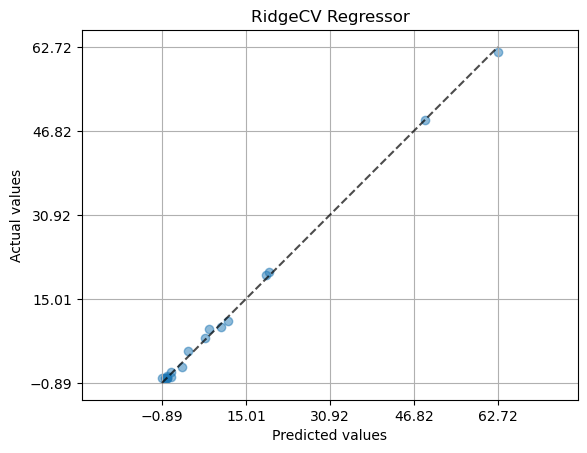

,Mut_Freq,Predicted Value
26,0.00,0.115094
84,20.12,19.374409
2,0.00,-0.237791
55,9.29,7.966954
68,0.17,0.741618
81,10.76,11.709589
16,0.00,-0.028536
78,19.50,18.742799
54,0.00,-0.045521
66,7.52,7.353290


In [40]:
# Split the data into training/testing sets (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X_new_chosen, y, test_size=0.20, shuffle=True, random_state=0)


# Create linear regression object
R_CV = linear_model.RidgeCV(cv=5)

pipe_R_CV = Pipeline([('scaler', StandardScaler()), ('R_CV', R_CV)])

# Train the model using the training sets
pipe_R_CV.fit(X_train, y_train.values.ravel())

# Make predictions using the testing set
y_pred = pipe_R_CV.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


R = pd.DataFrame(y_test)

R['Predicted Value'] = y_pred

D = PredictionErrorDisplay.from_predictions(R['Mut_Freq'], R['Predicted Value'], kind="actual_vs_predicted", scatter_kwargs={"alpha": 0.5})

plt.grid()
plt.title('RidgeCV Regressor')
plt.show()

R

# Selected Model:  RidgeCV Regressor 

# RidgeCV Regressor

In [41]:
# RidgeCV Regressor find the best parameters internally by cross validation (5 folds by default)

# Create RidgeCV Regressor object & pipeline
R_CV = linear_model.RidgeCV(cv=5) 
pipe_R_CV = Pipeline([('scaler', StandardScaler()), ('R_CV', R_CV)])

#### Fit with all data
pipe_R_CV.fit(X_new_chosen, y.values.ravel())

# Now RidgeCV Regressor is ready to be used

Pipeline(steps=[('scaler', StandardScaler()), ('R_CV', RidgeCV(cv=5))])

# Predict of mutation frequency for patients in dataset 2

In [42]:
# Test of dataset 2 (Patient vs Normal)

X4 = X2[X_new_chosen.columns]

#Create new DataFrame for all patients in dataset 2
dataset_2_results = pd.DataFrame(data2[['Person', 'Progression', 'Period_rounded']])

#Add new column for binary prediction for all patients in dataset 2
dataset_2_results['Prediction'] = pipe_R_CV.predict(X4)

#Make some changes to column "Person"
dataset_2_results['Person'] = dataset_2_results['Person'].str.replace('Met_Fraction_', '')

dataset_2_results

##Export DataFrame dataset_2_results to csv file DataFrame dataset_2_results to csv file
dataset_2_results.to_csv('./results/RidgeCV_dataset_2_results', index=False)

# Part 2 (Monitoring of ctDNA level)

## Predict mutation frequency for all tests for patients in both datasets and create data frame for all patients

In [43]:
df_all = main_func(X_new_chosen, pipe_R_CV)

#Export DataFrame df_all to csv file
df_all.to_csv('./results/regression_df_all_RidgeCV', index=False)

## Create a plot for all tests for each patient

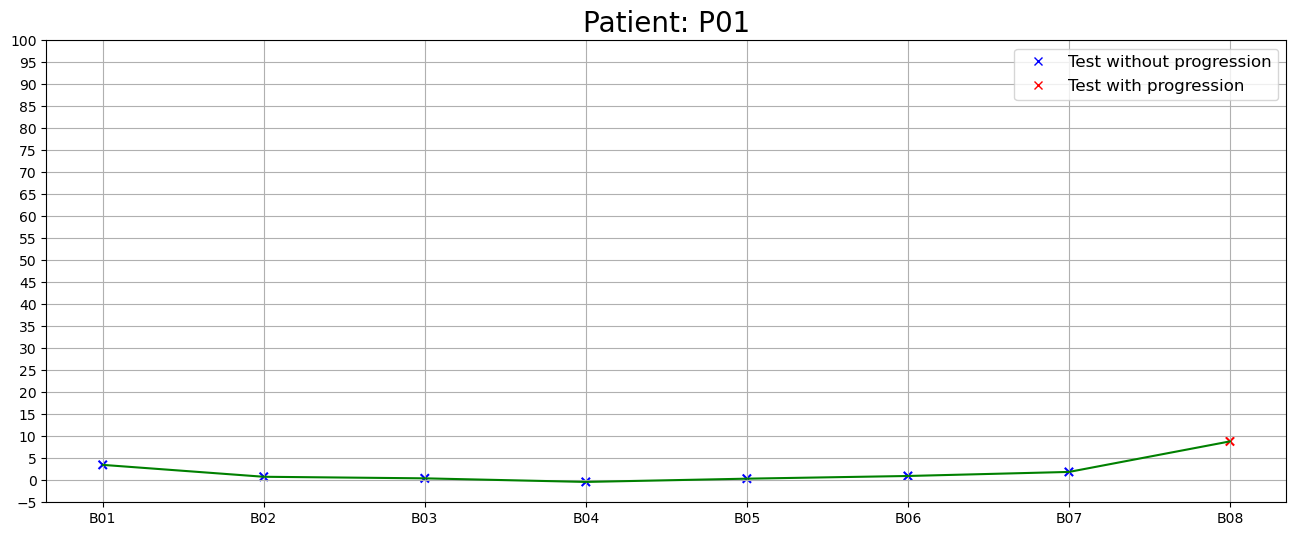

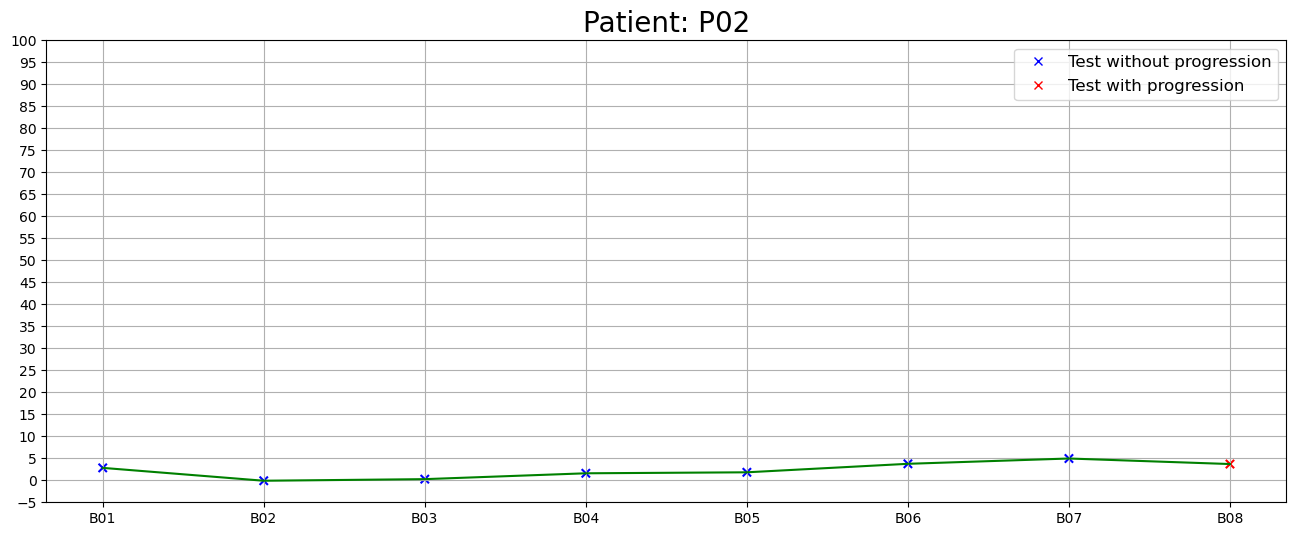

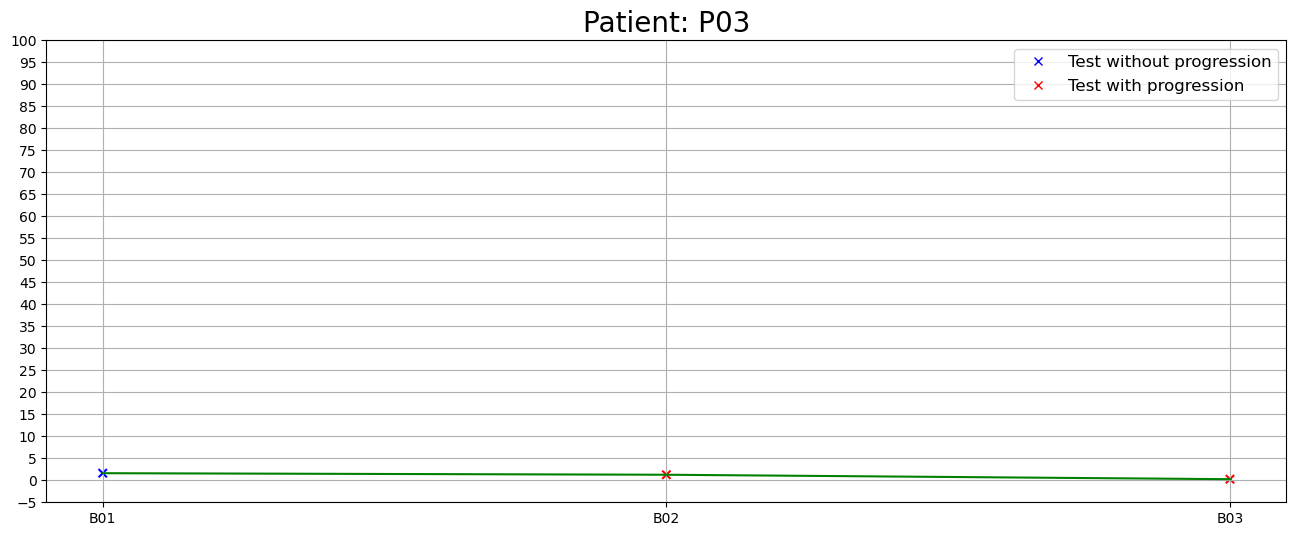

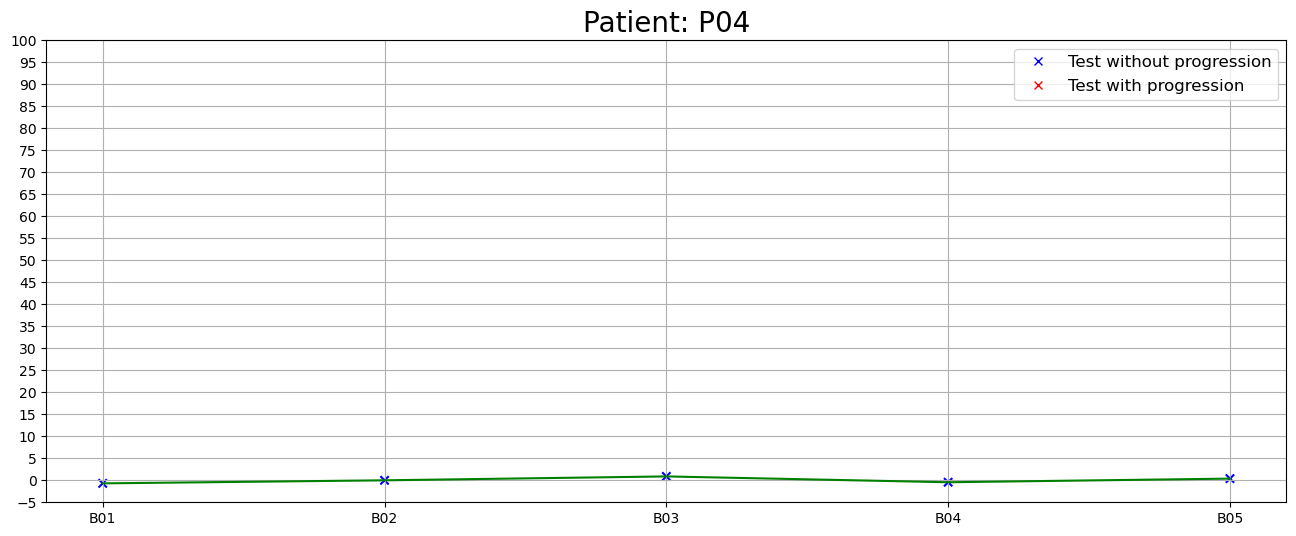

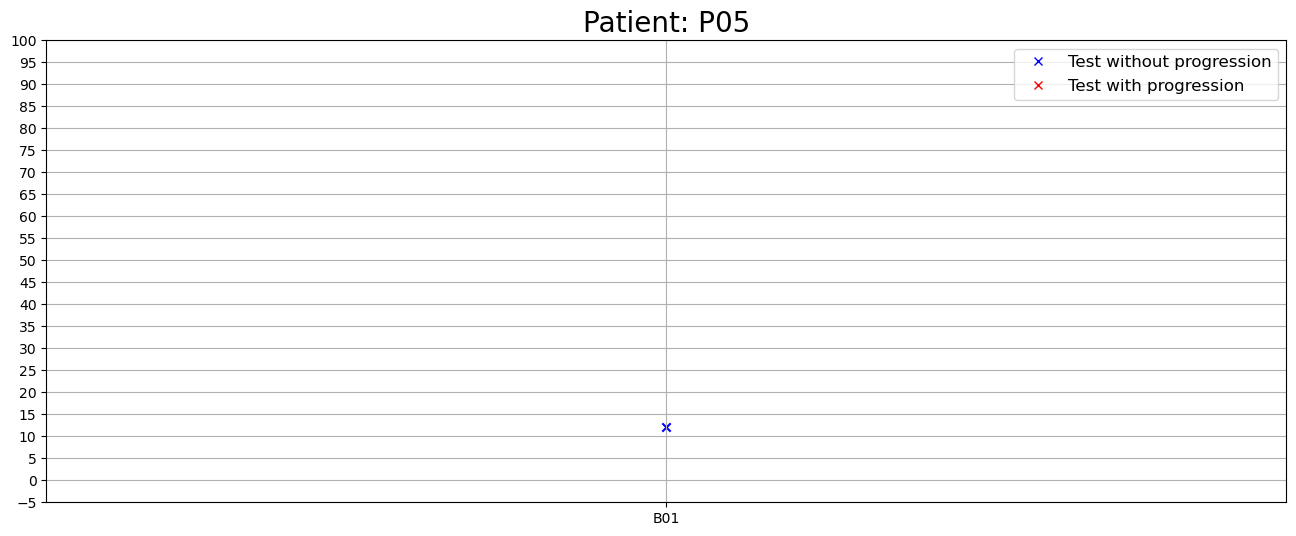

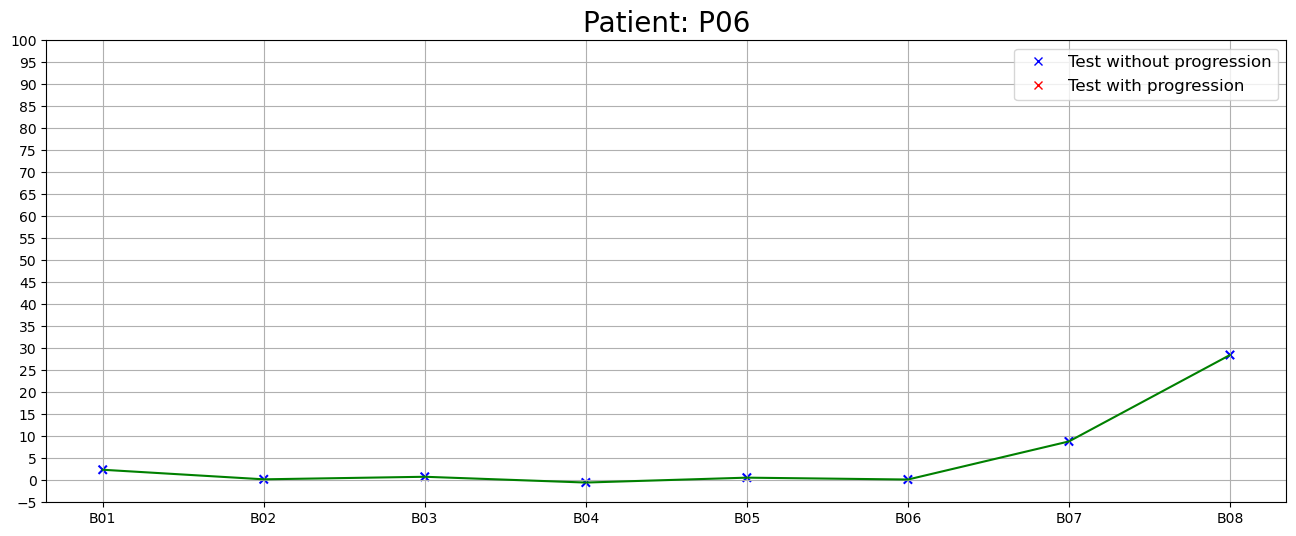

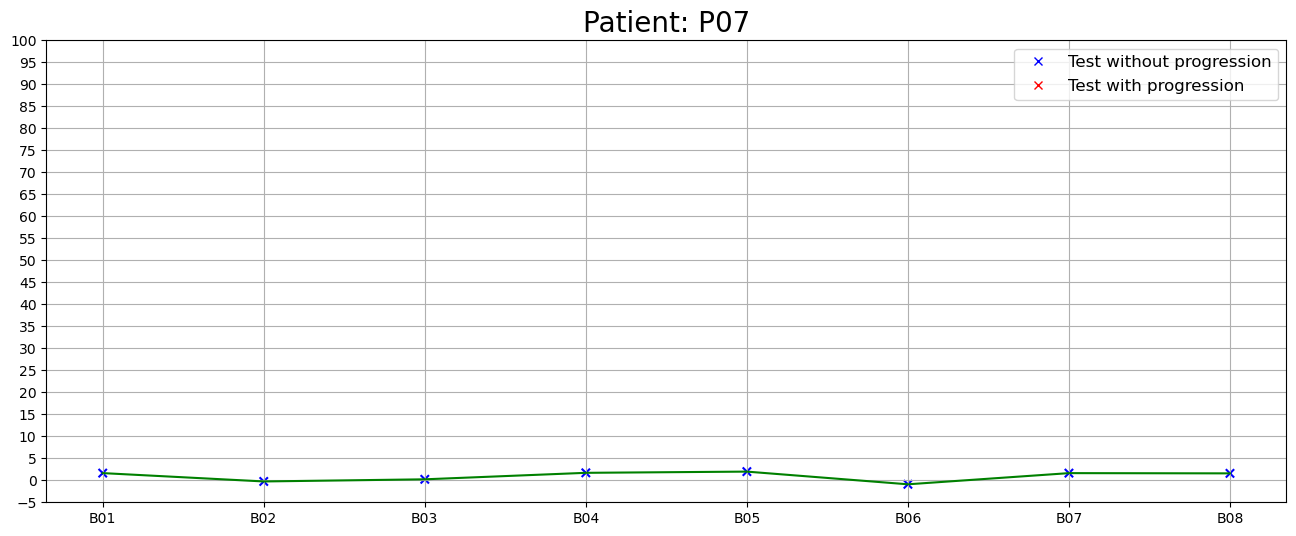

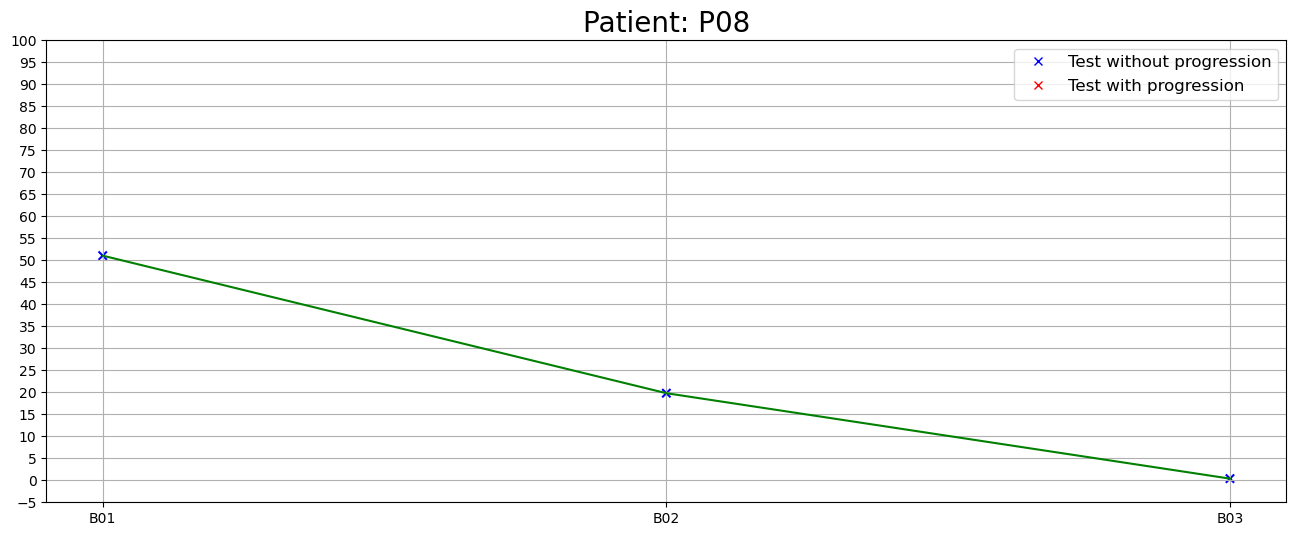

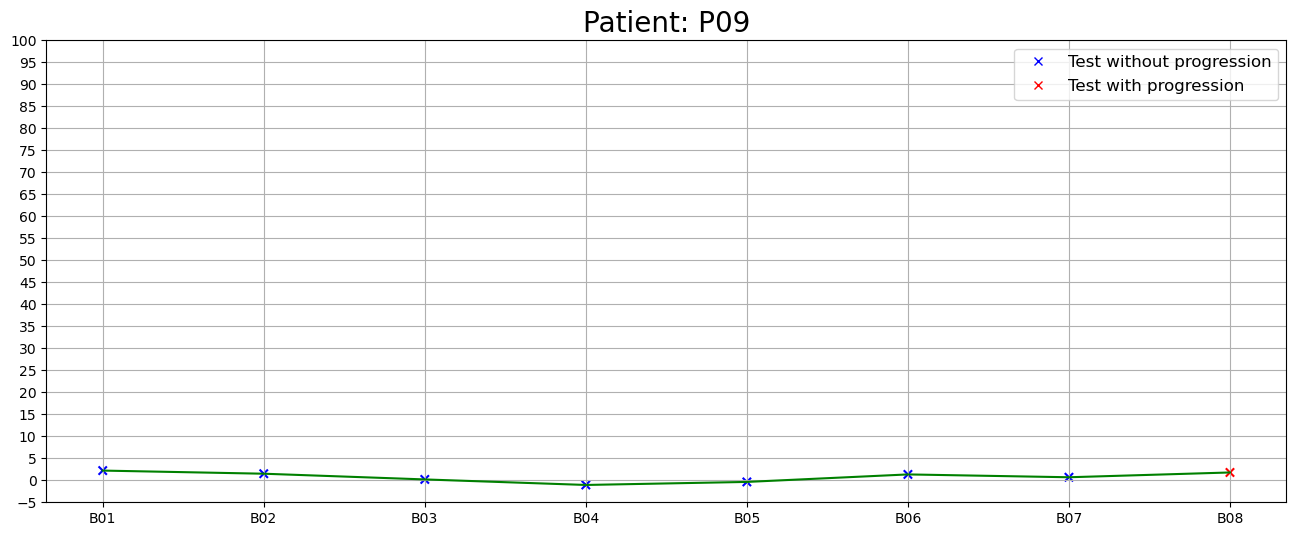

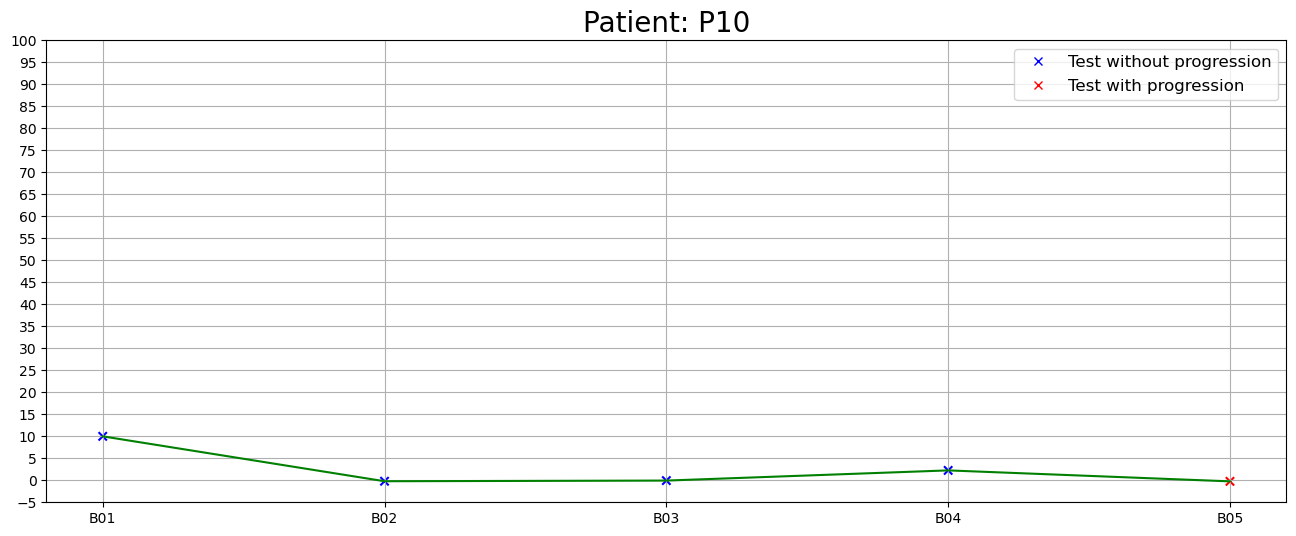

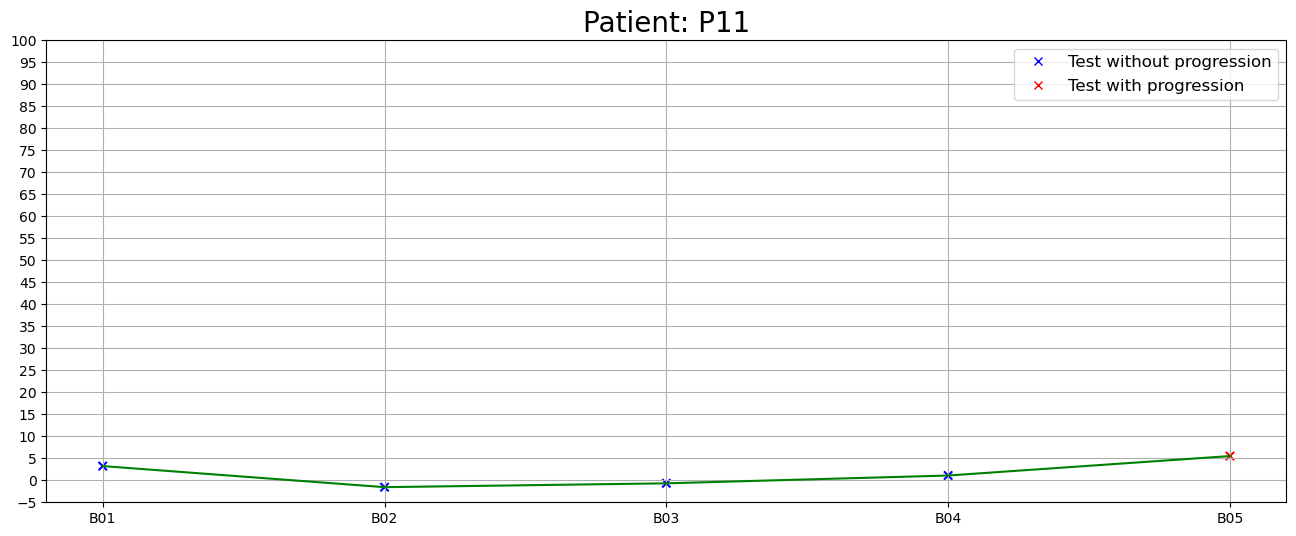

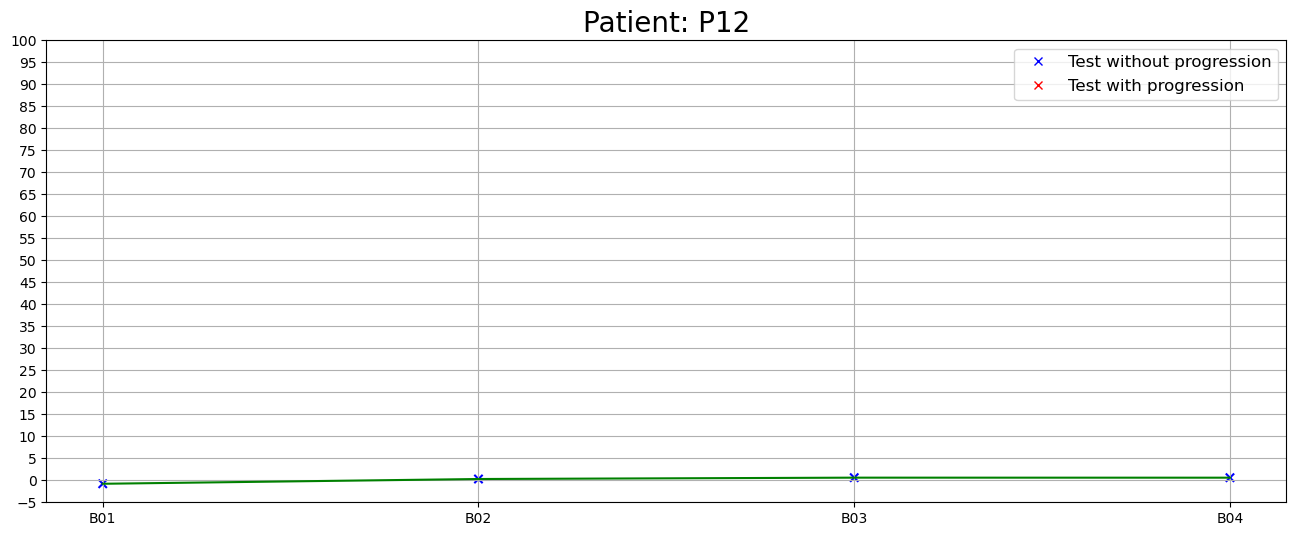

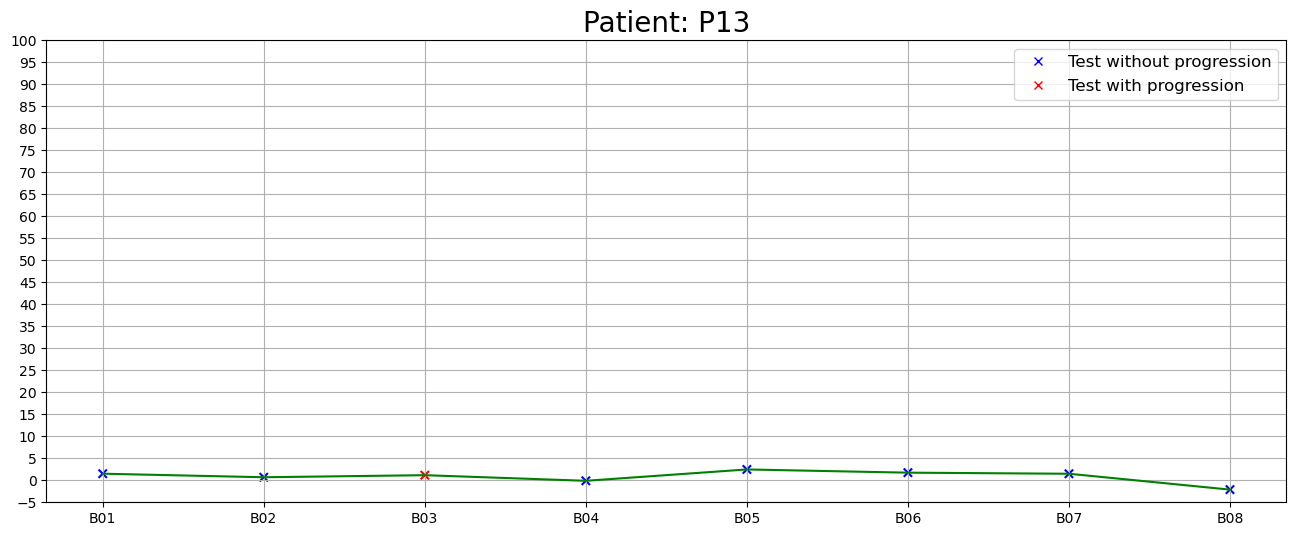

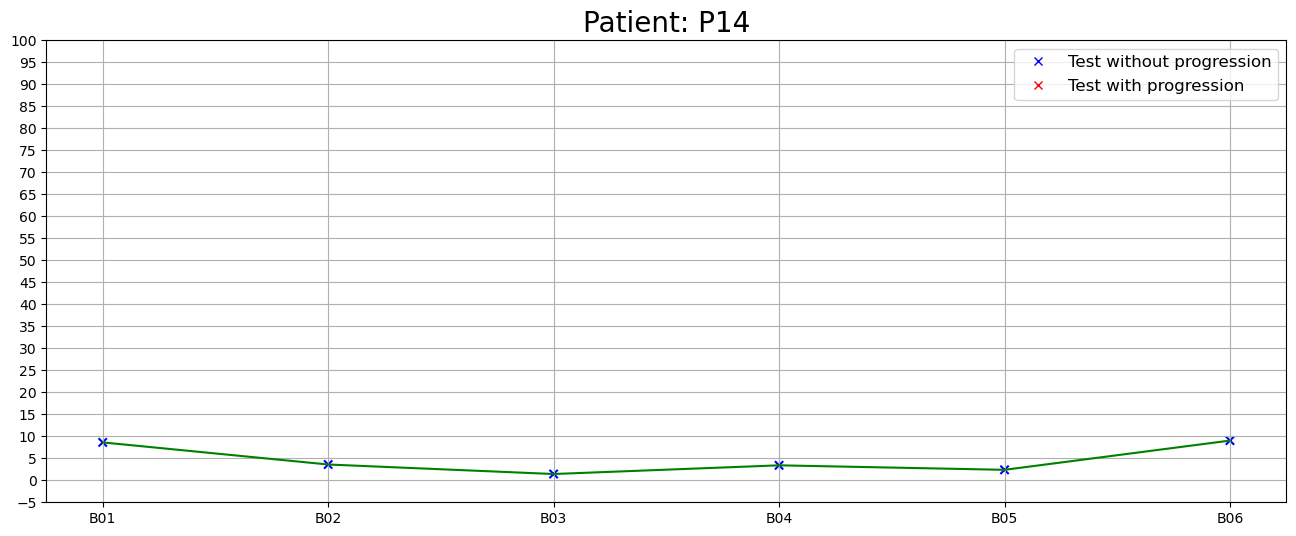

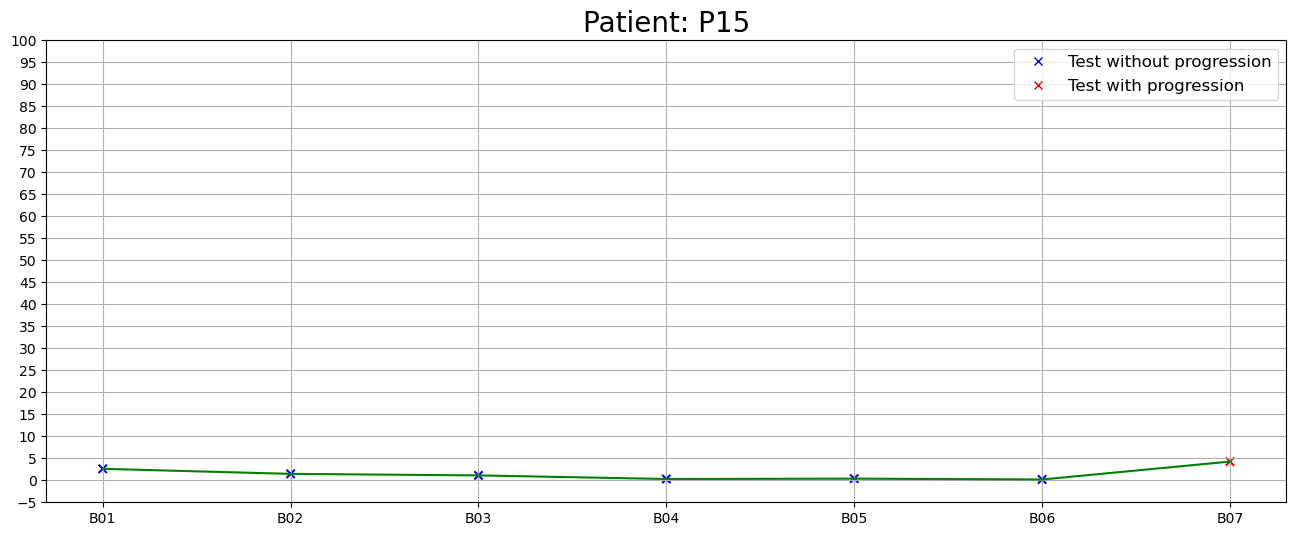

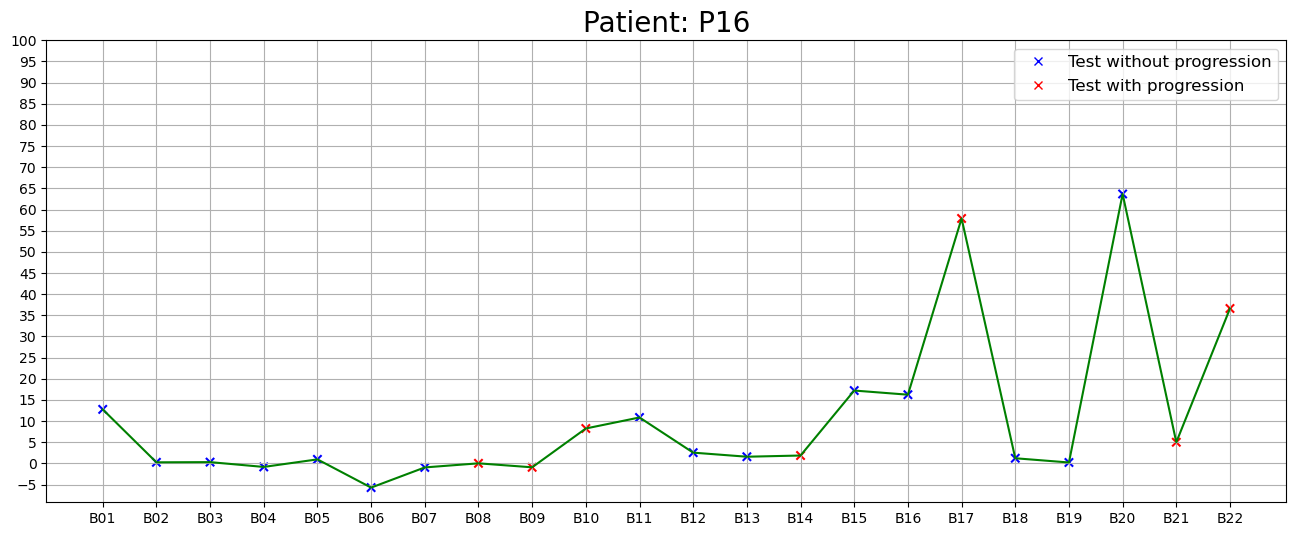

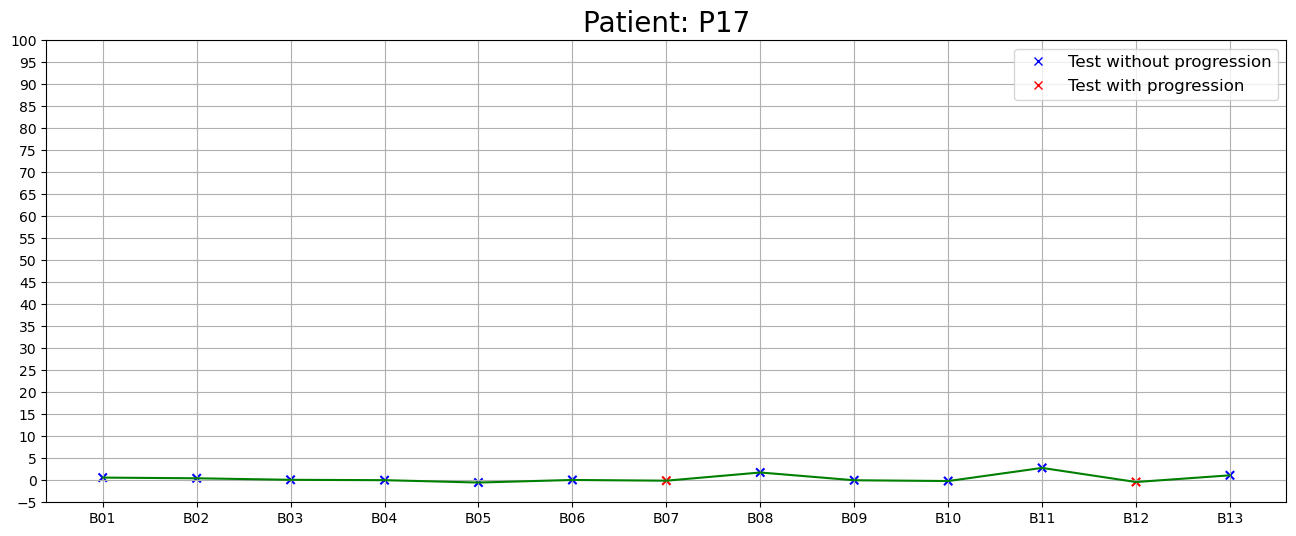

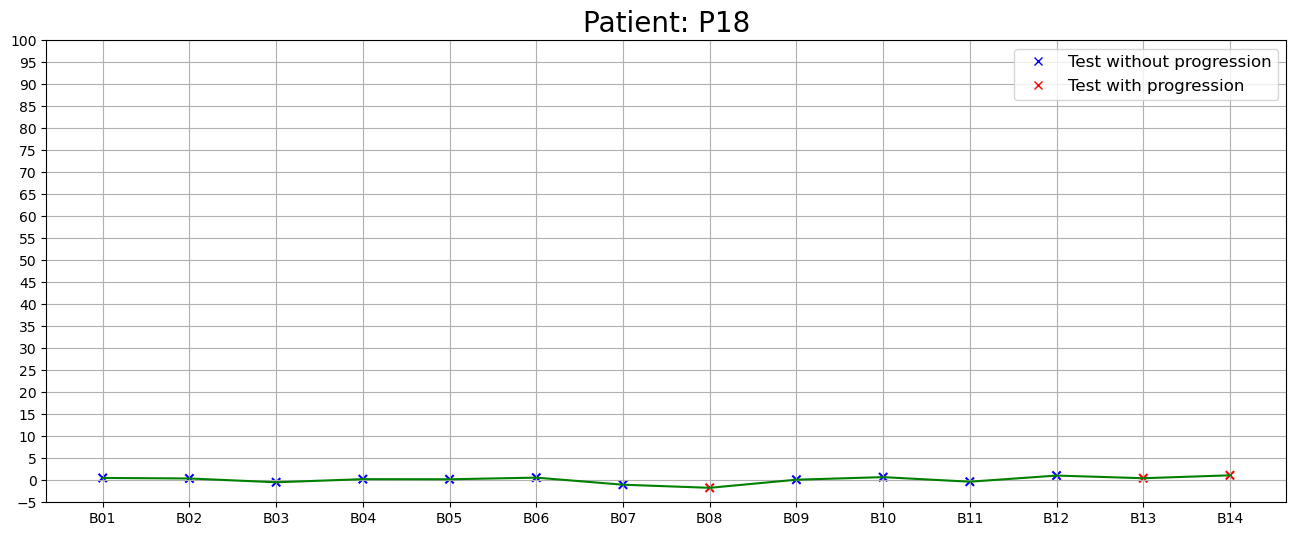

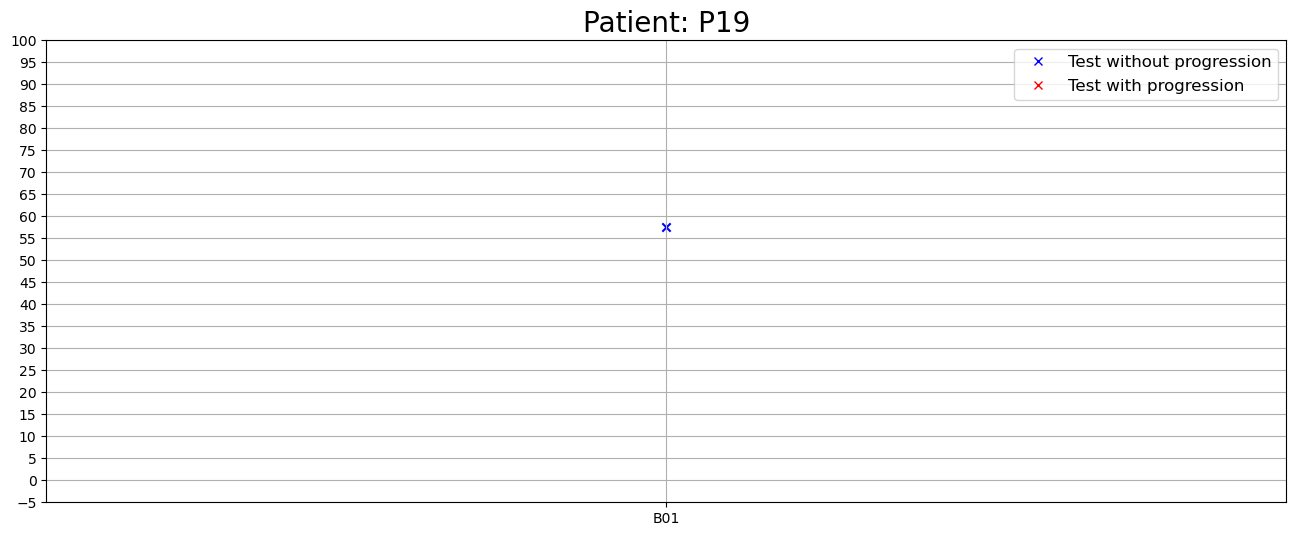

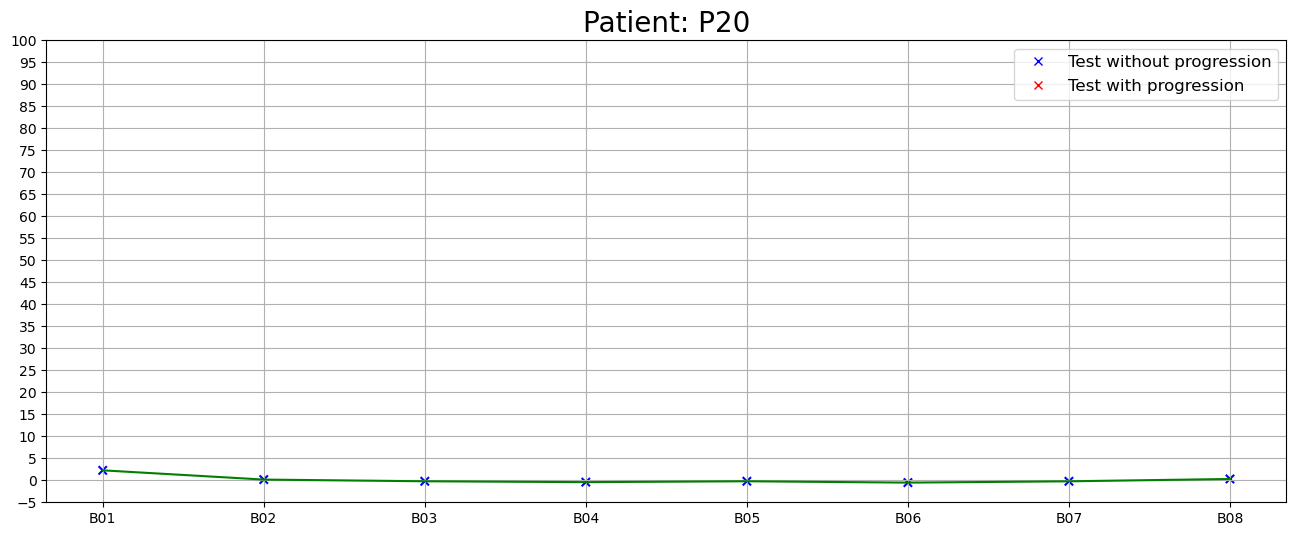

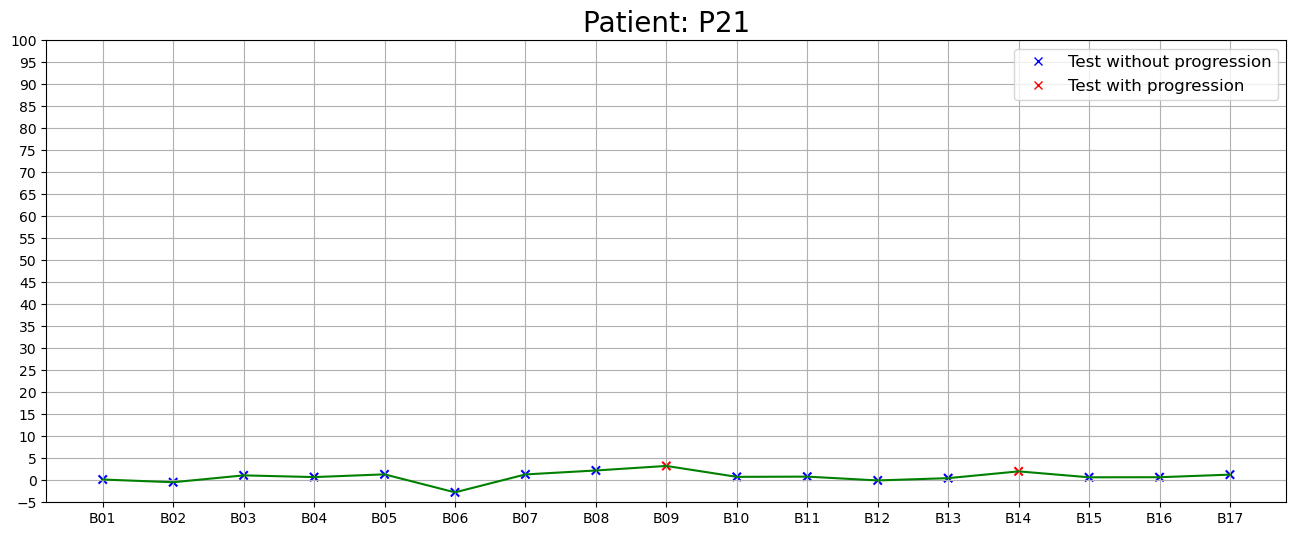

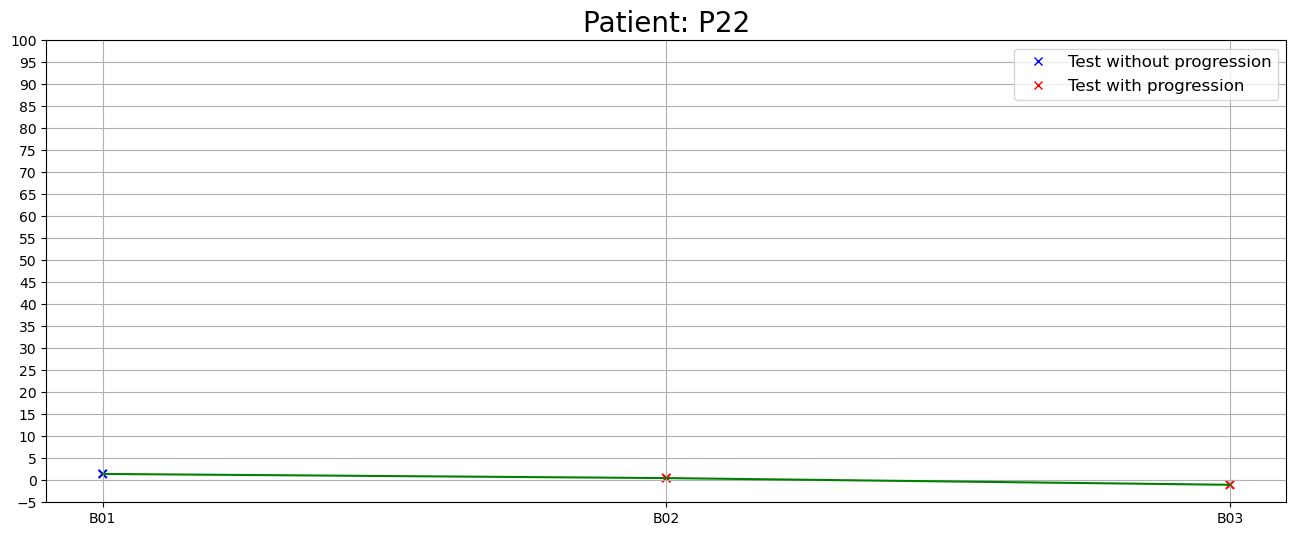

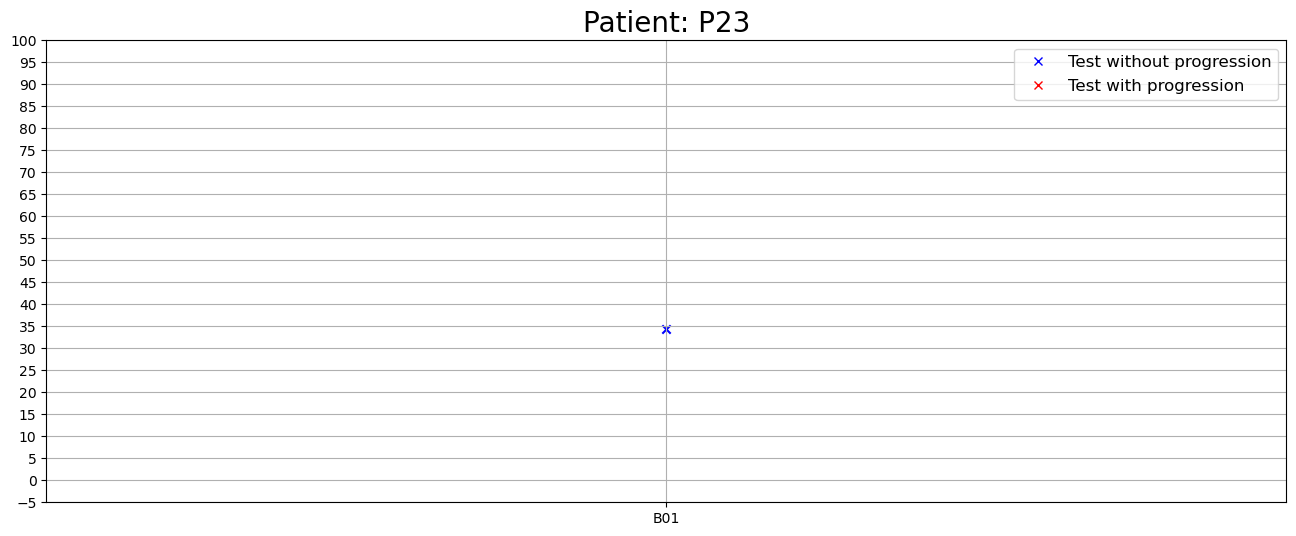

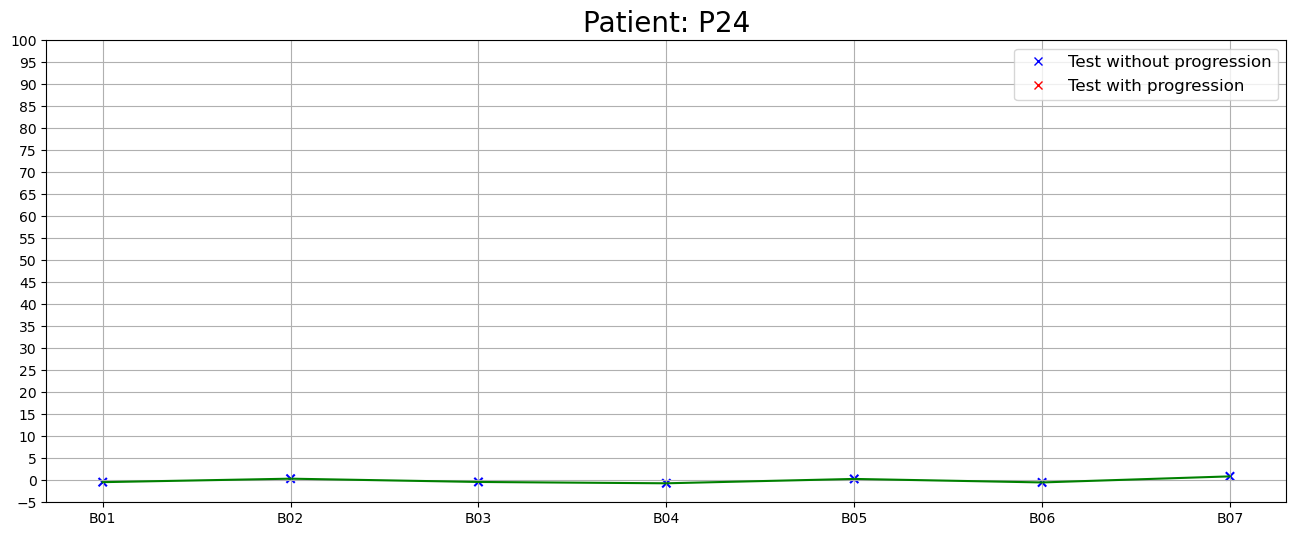

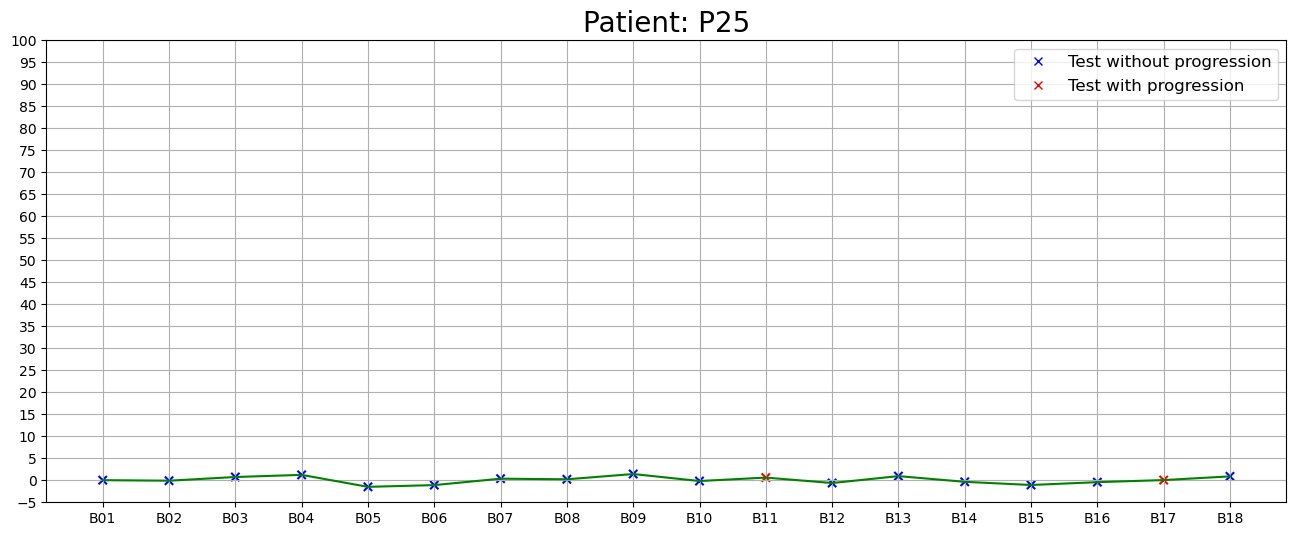

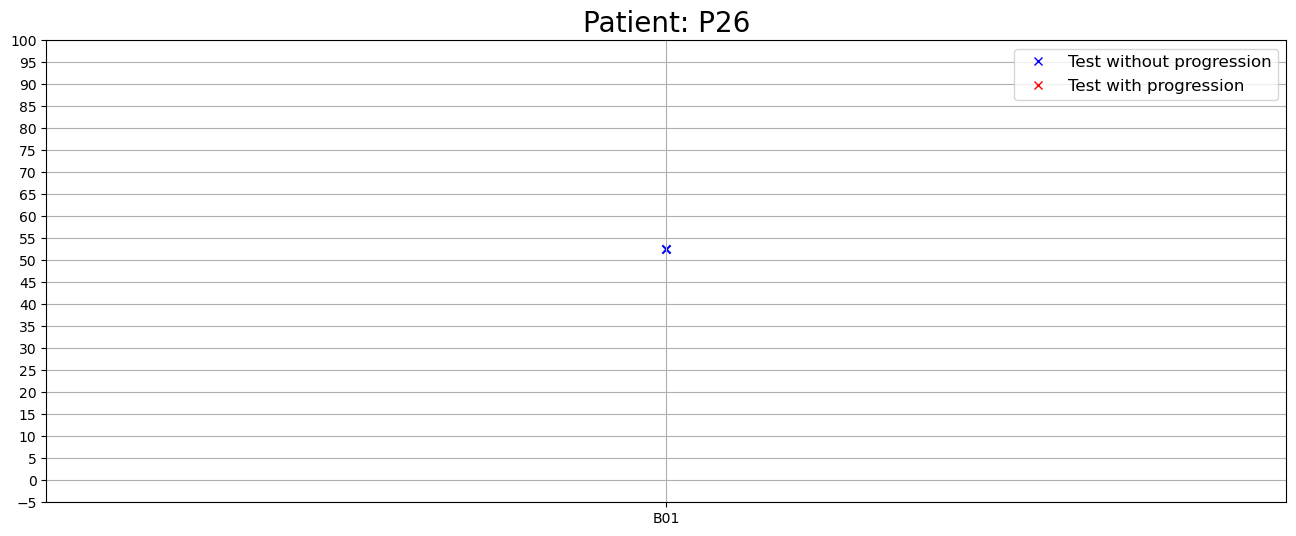

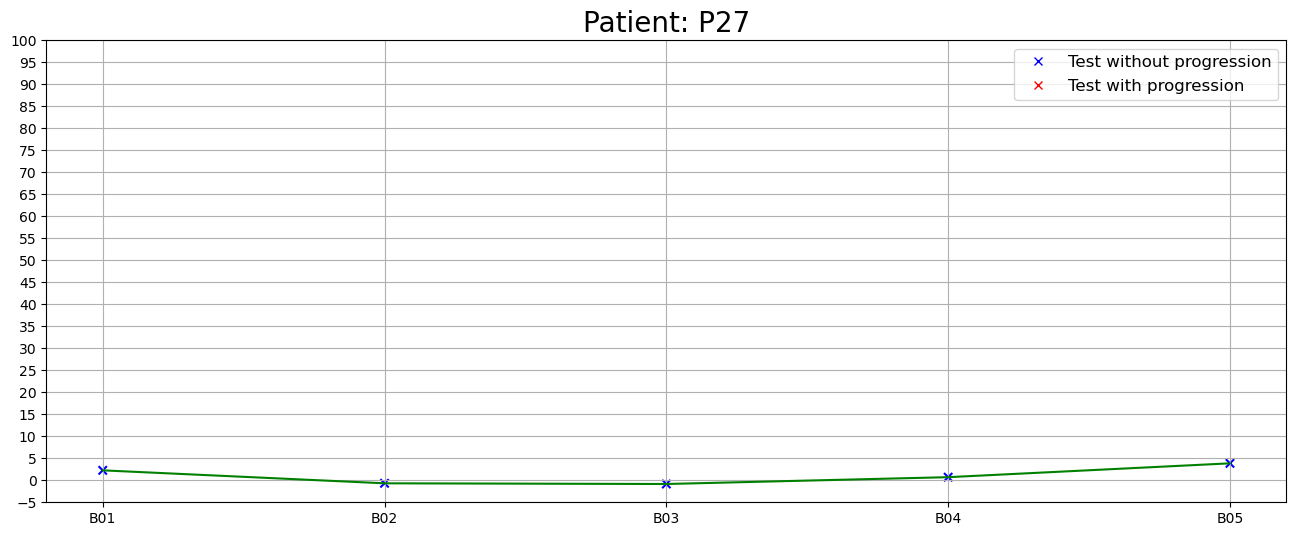

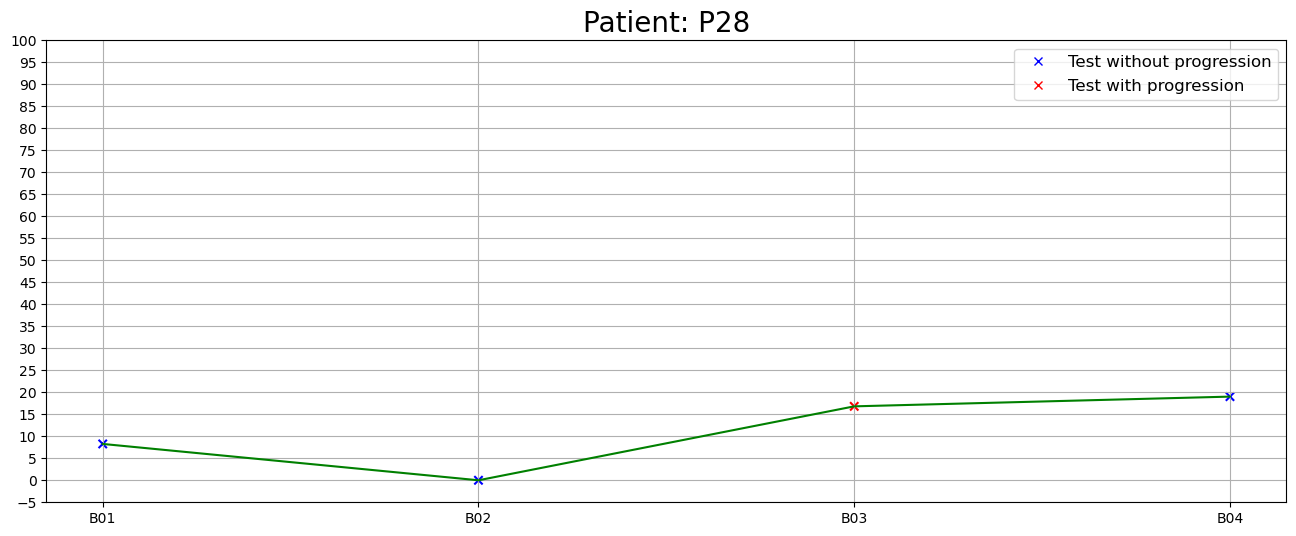

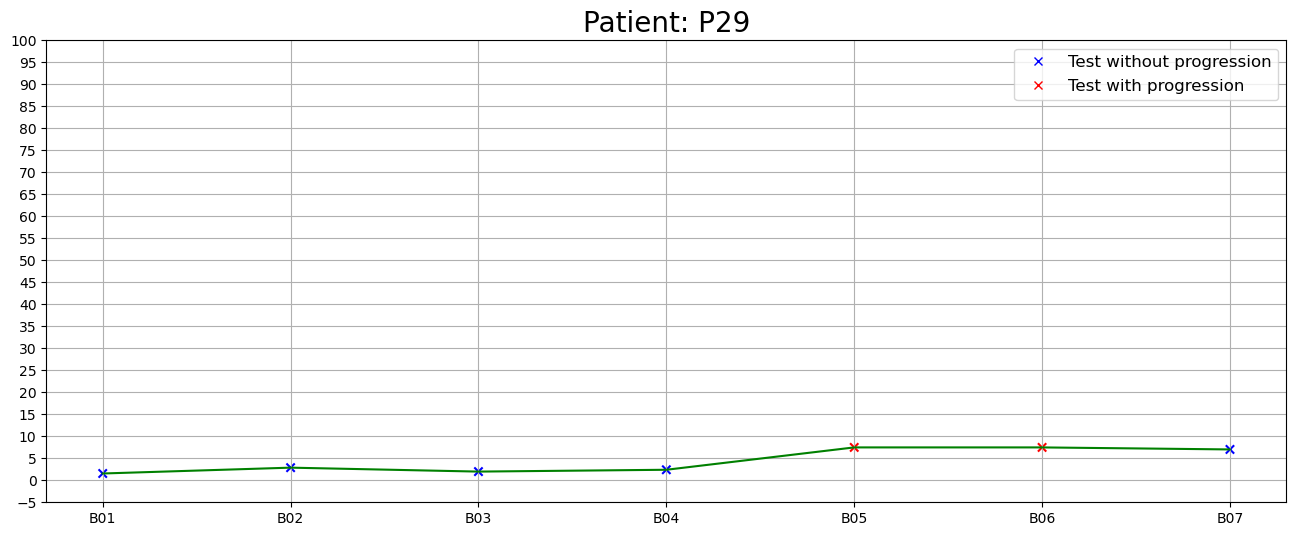

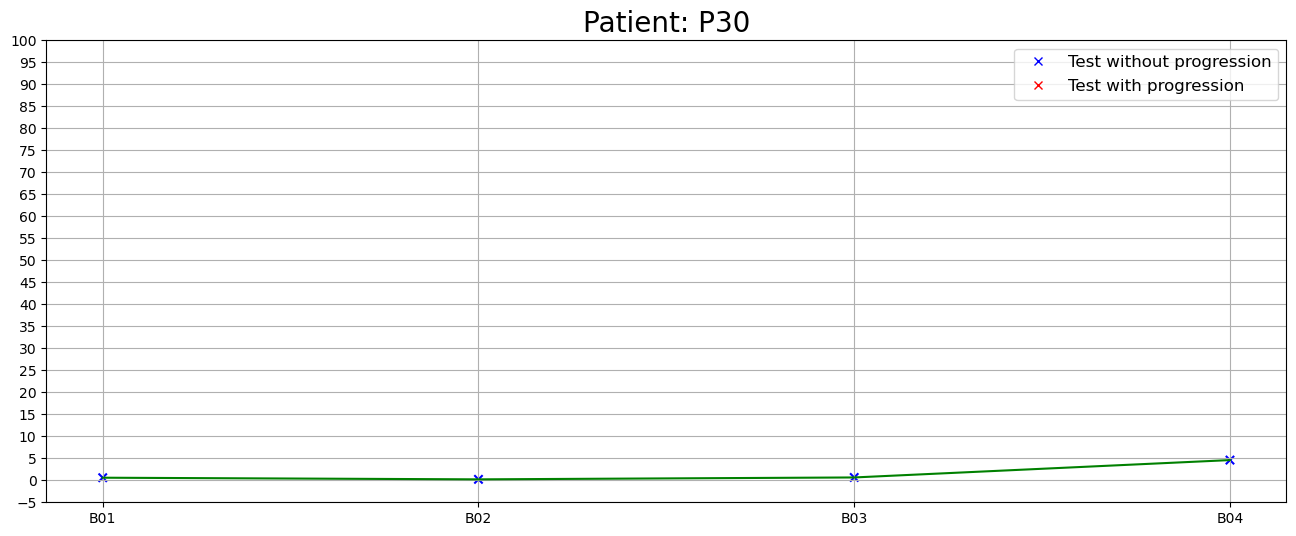

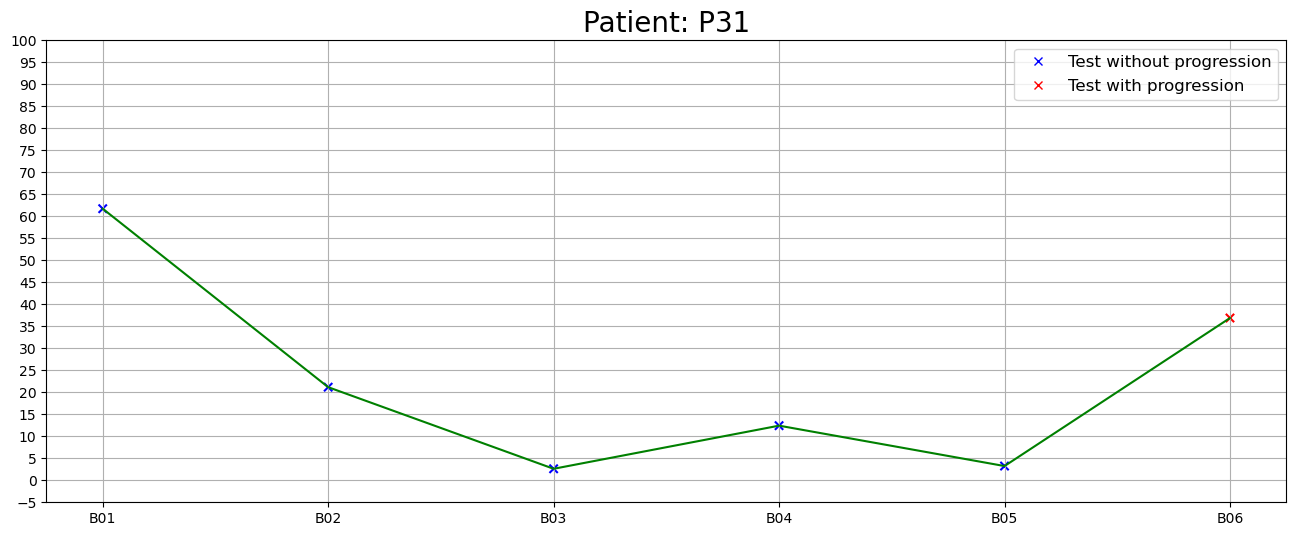

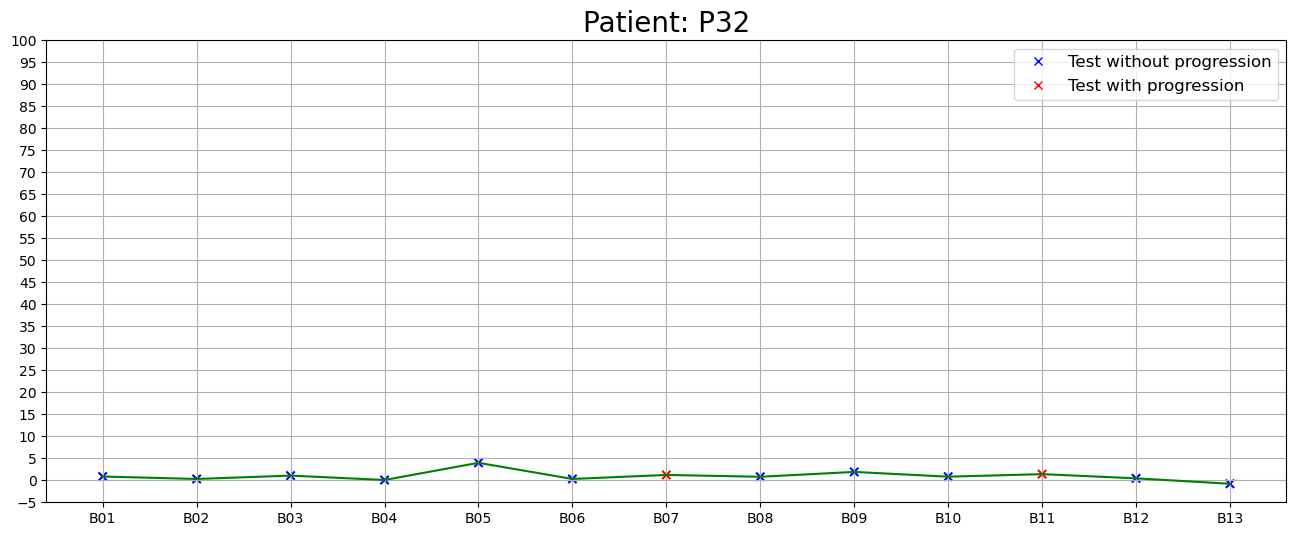

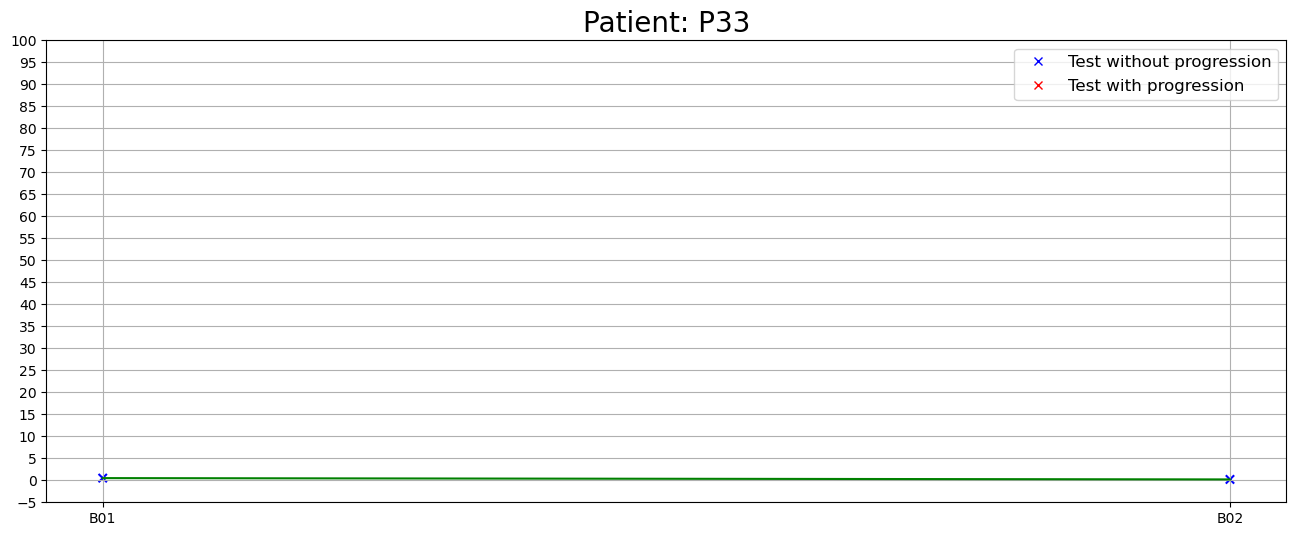

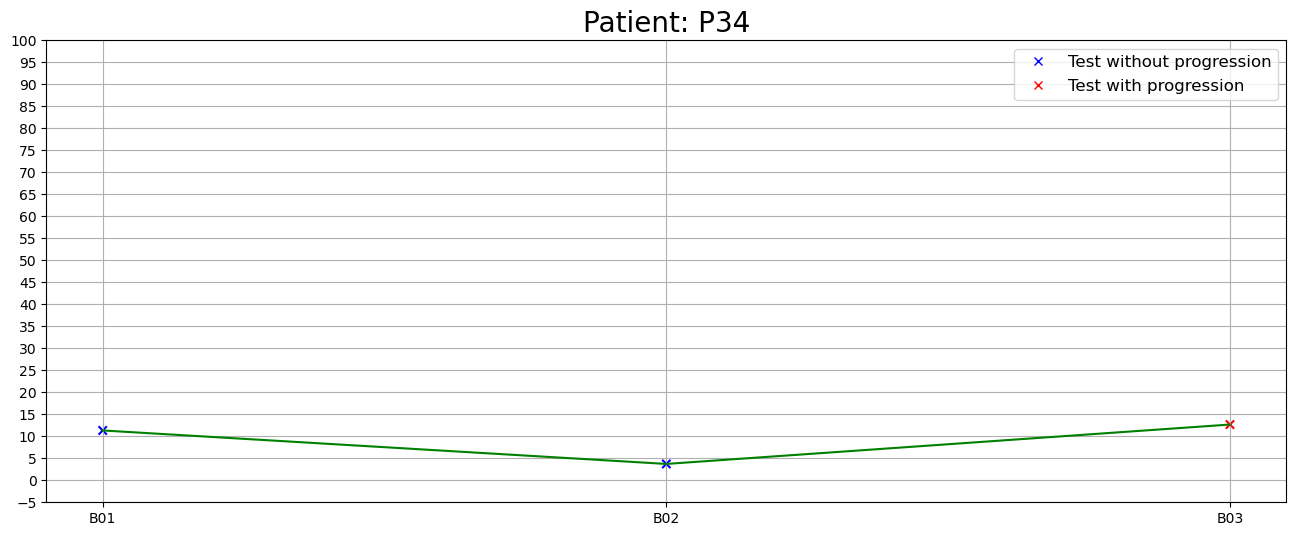

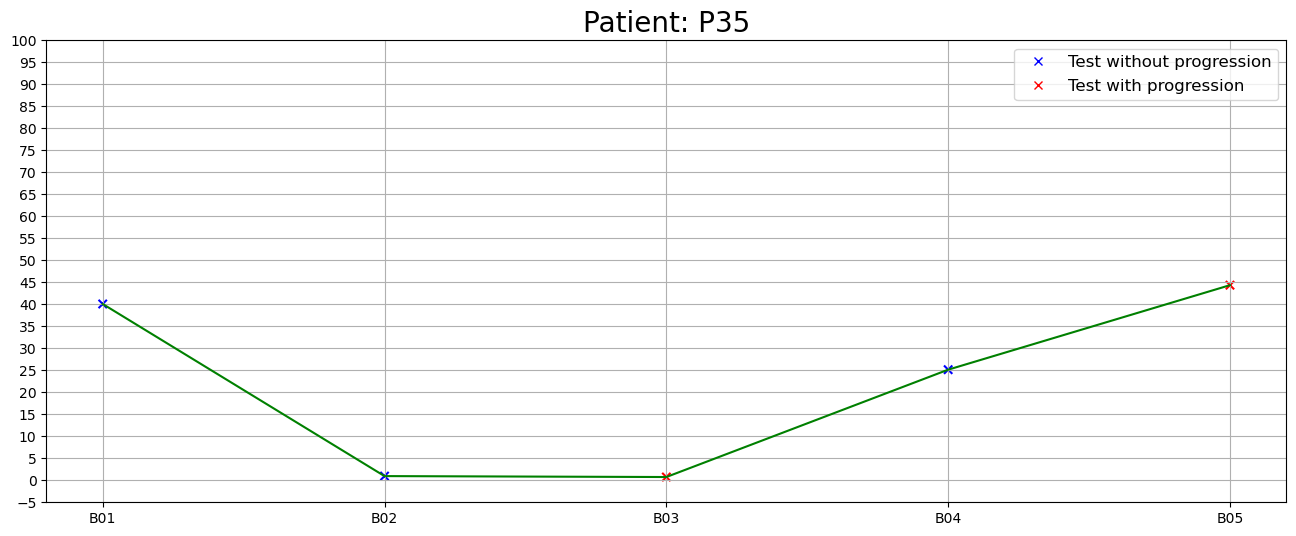

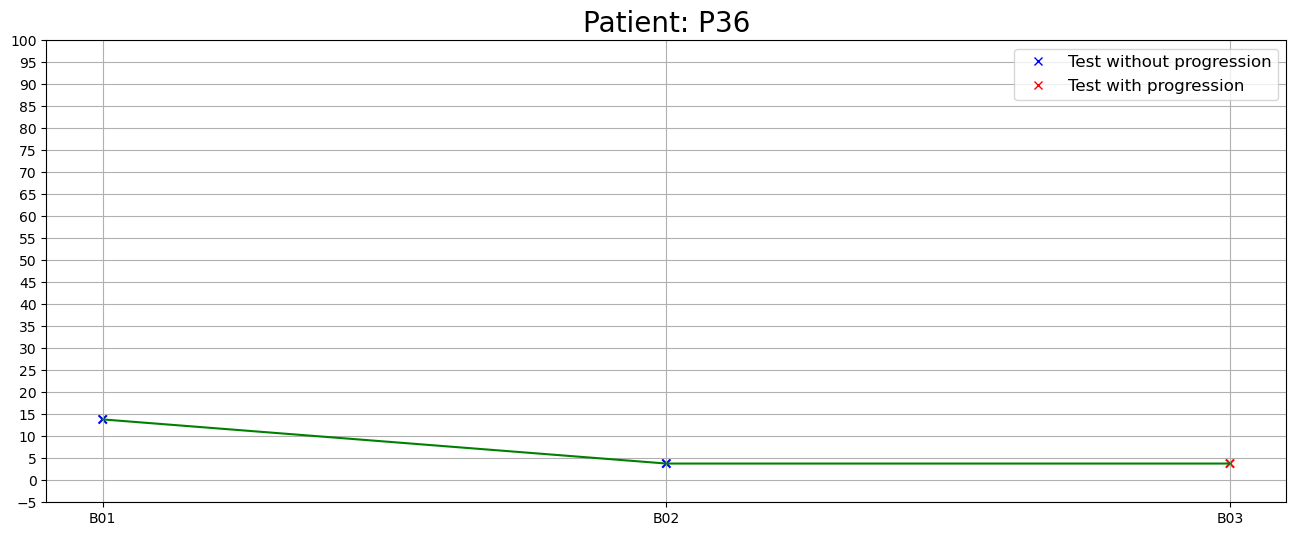

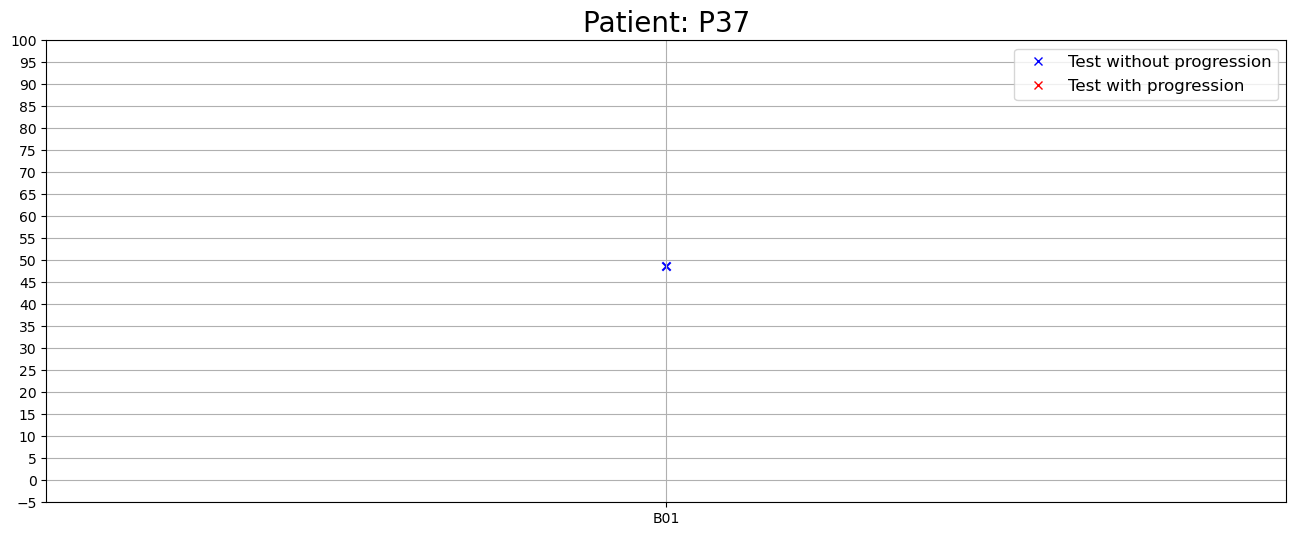

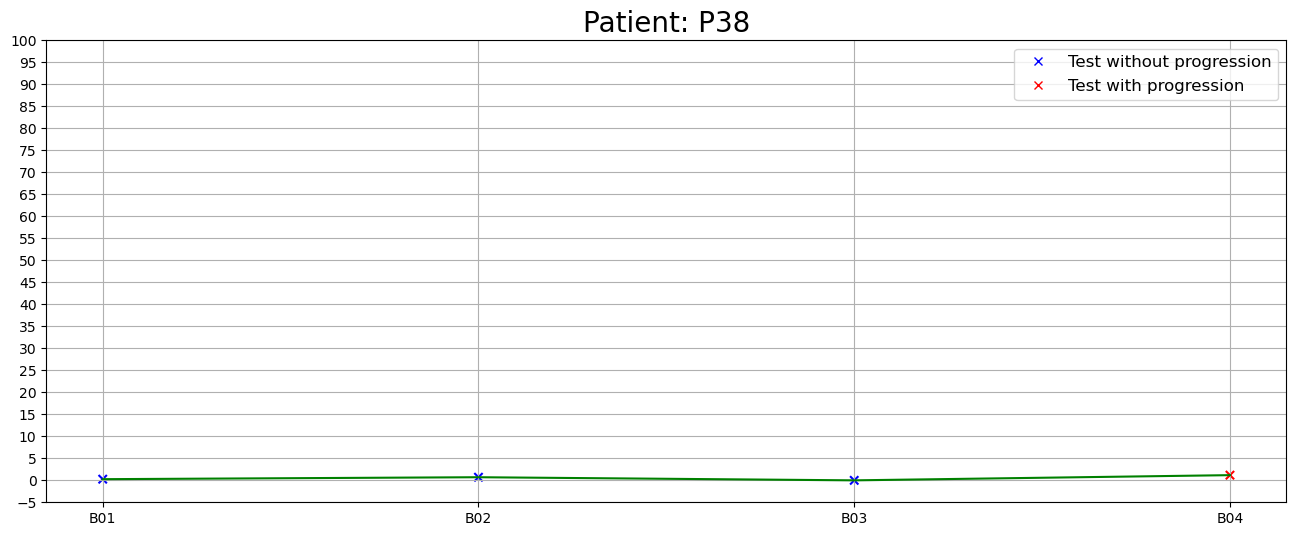

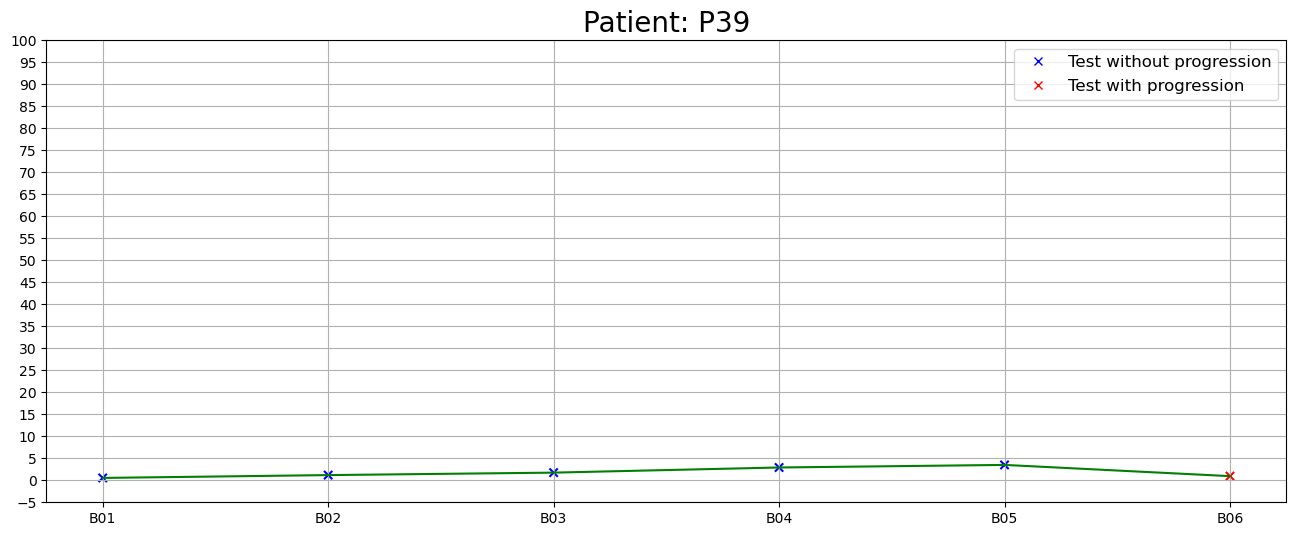

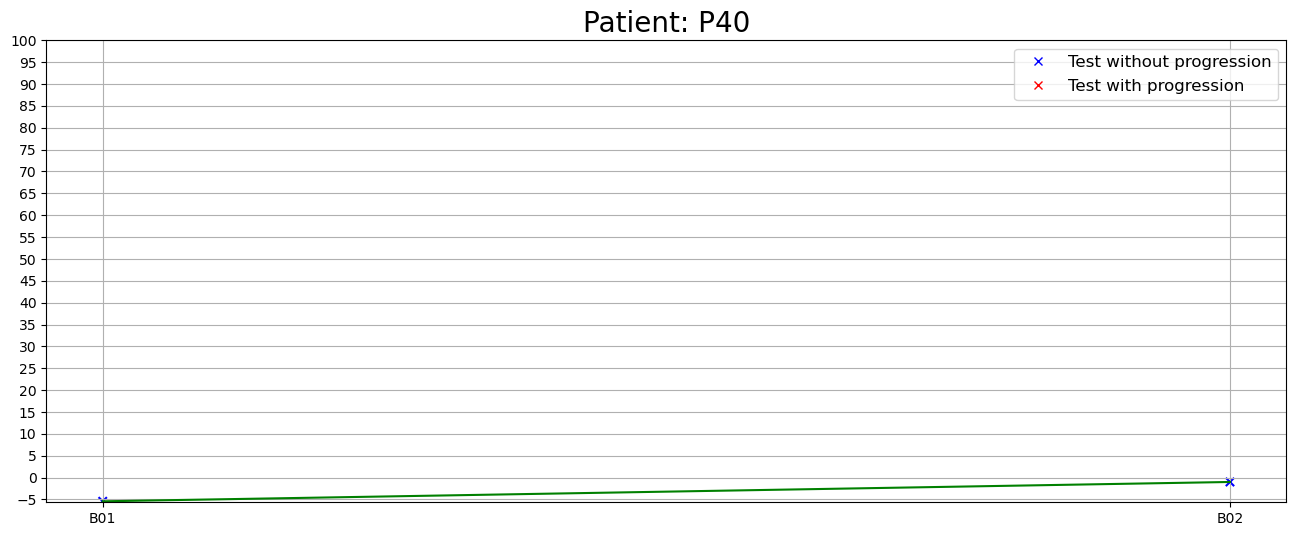

In [44]:
plot_each_patient(df_all)

## Create a plot for tests with first progression as reference point

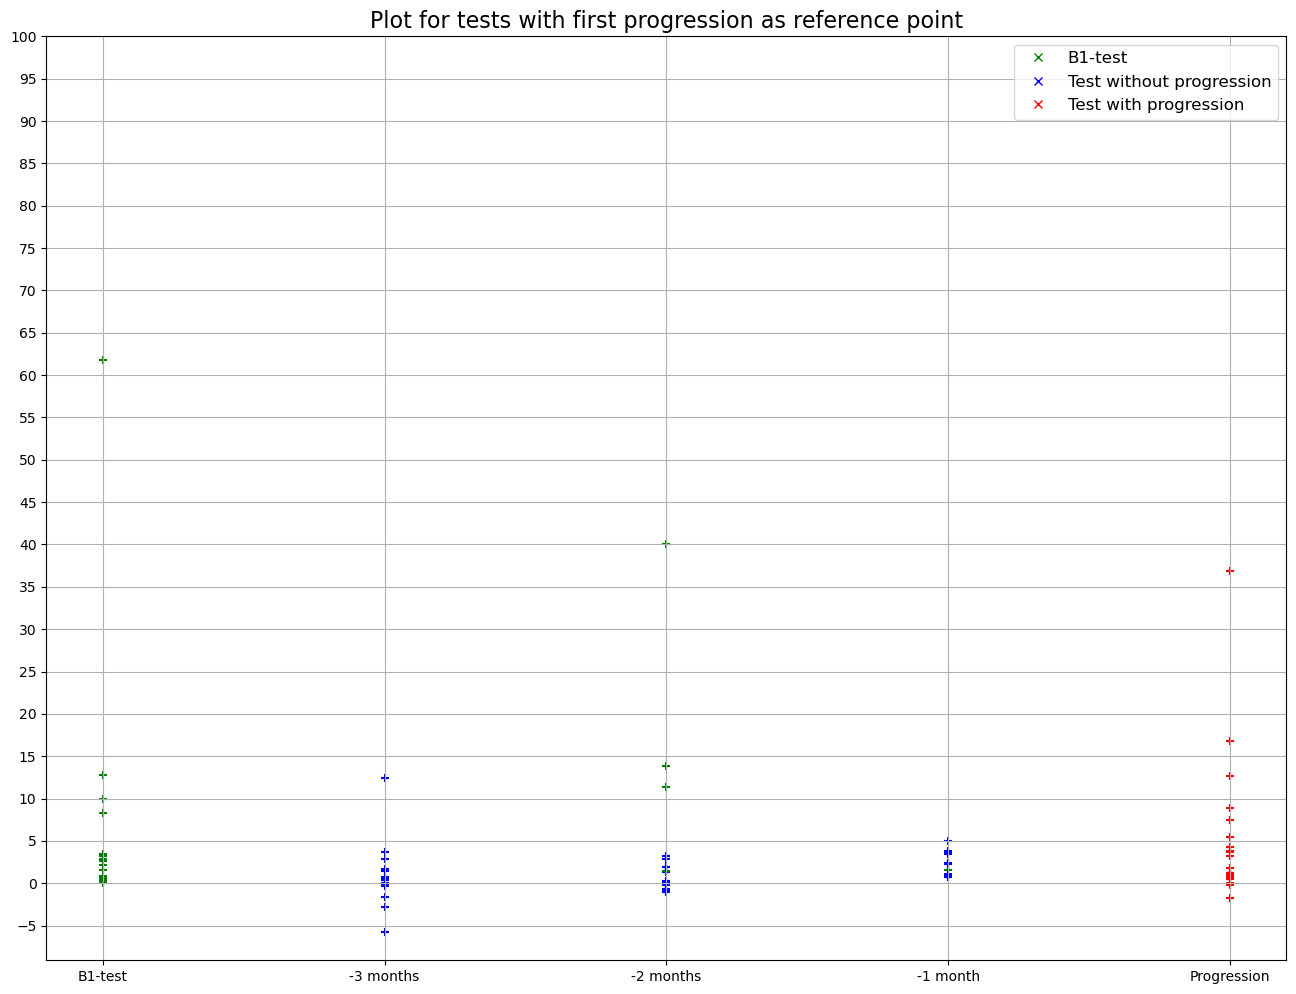

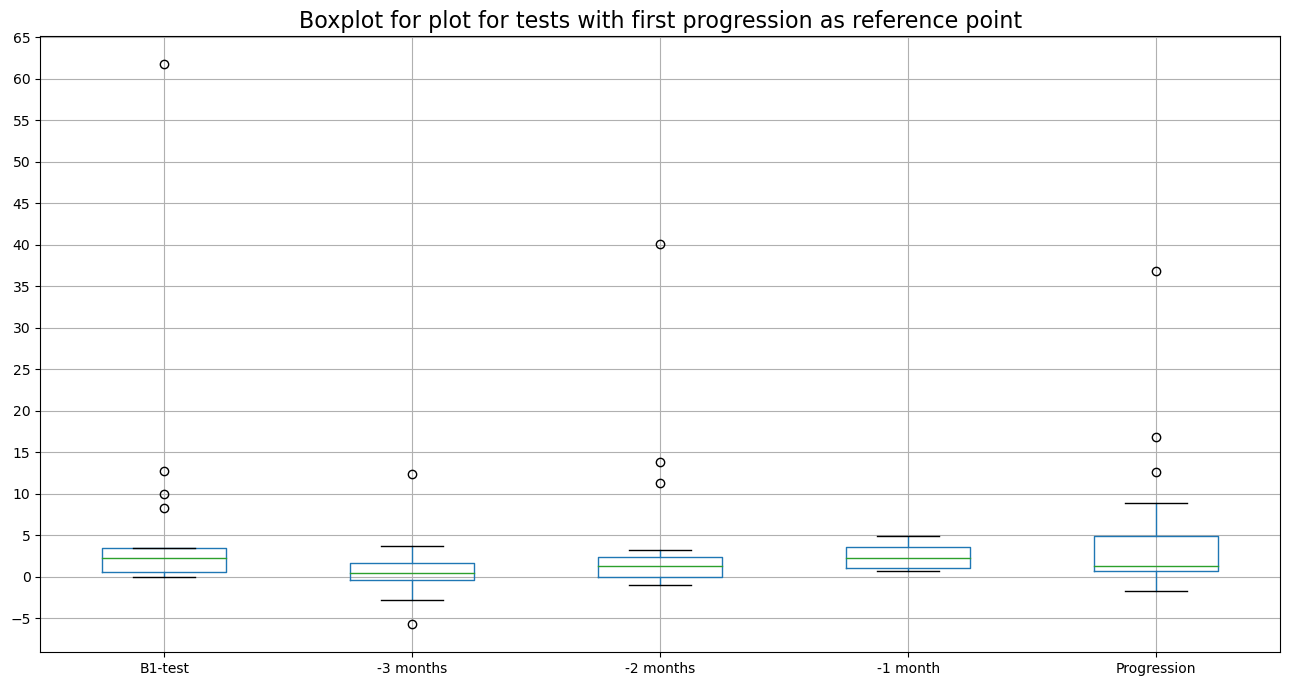

In [45]:
months_1 = plot_1st_prog_ref(df_all)

#### Plots

In [46]:
months_1

,Person,B1-test place,B1-test,-3 m,-2 m,-1 m,Progression
0,P01,B1-test,3.501346,NaN,1.896485,NaN,8.838068
1,P02,B1-test,2.819539,3.742941,NaN,4.946572,3.689873
2,P03,-1 m,NaN,NaN,NaN,1.608929,1.25852
3,P09,B1-test,2.202835,-0.37418,1.33049,0.687397,1.774503
4,P10,B1-test,9.986238,-0.217609,-0.069651,2.245862,-0.247023
5,P11,B1-test,3.225565,-1.564088,-0.695532,1.082763,5.504185
6,P13,-2 m,NaN,NaN,1.493786,0.68965,1.157029
7,P15,B1-test,2.603931,0.372465,0.180372,NaN,4.247232
8,P16,B1-test,12.767515,-5.719296,-0.951137,NaN,0.015338
9,P17,B1-test,0.609029,0.071649,NaN,NaN,-0.092052


## Wilcoxon Signed-Rank Test for first progression as reference point

In [47]:
wilcoxon_1st_prog(months_1)

,-3 months,-2 months,-1 month,Progression
B1-test,0.090576,0.029541,1.0,0.893212
-3 months,,0.909668,0.03125,0.090576
-2 months,,,0.556641,0.195633
-1 month,,,,0.469727


## Create a plot for patients tests with first test (B1 test) as reference point

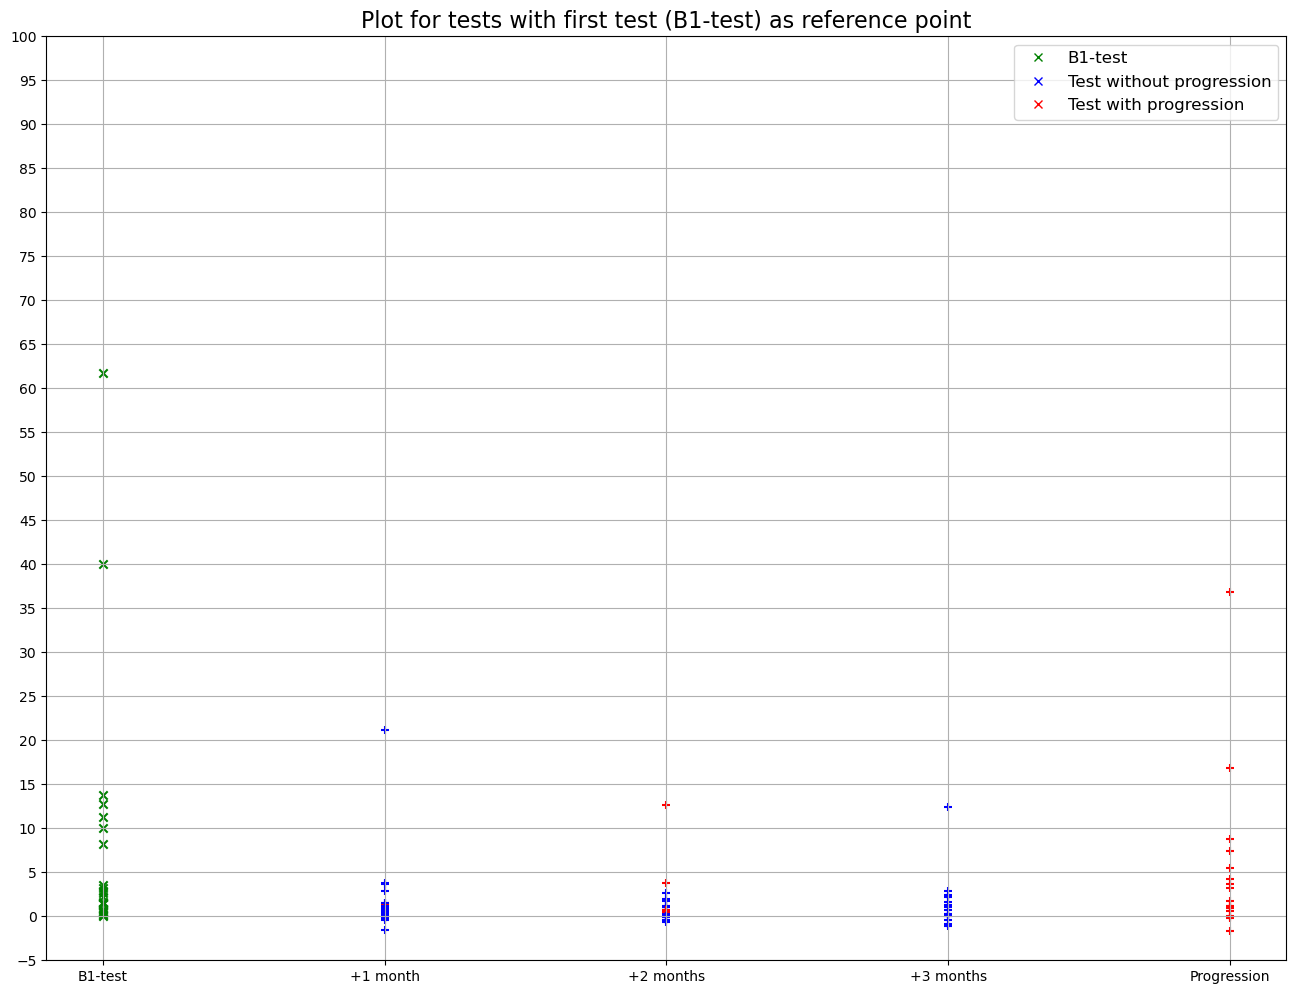

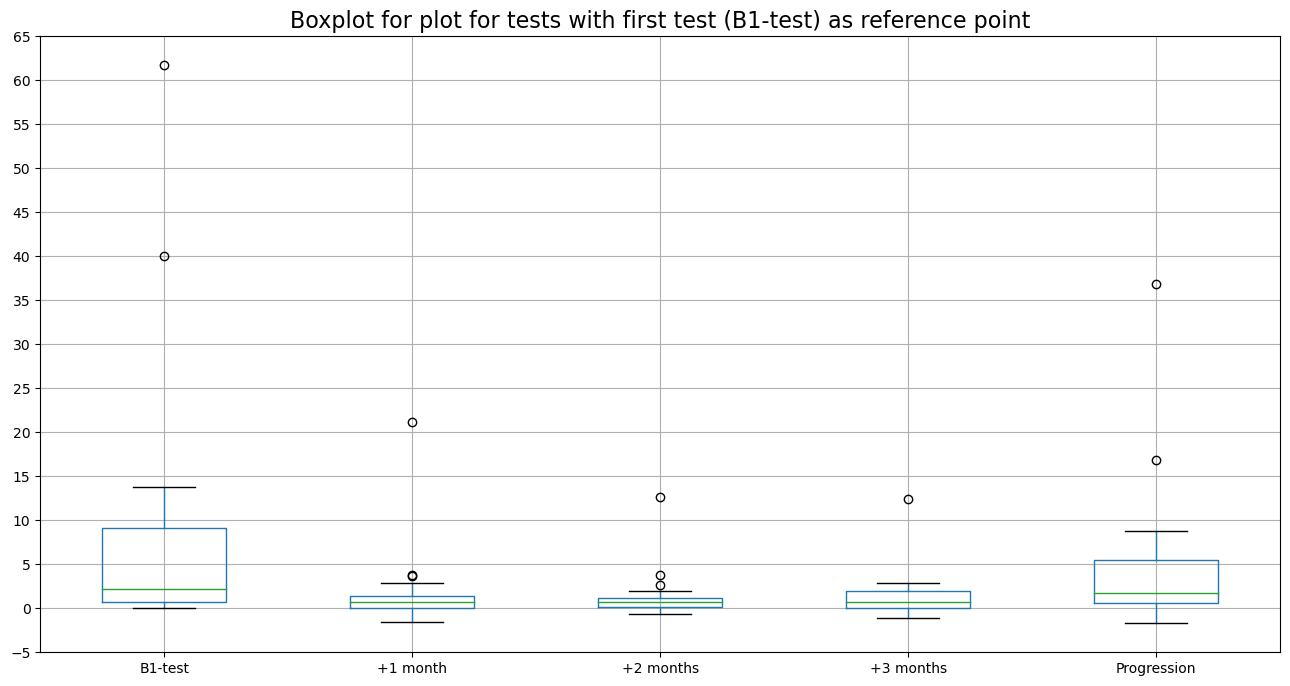

In [48]:
months_2 = plot_B1_test_ref(df_all)

#### Plots

In [49]:
months_2

,Person,B1-test,+1 m,+2 m,+3 m,Progression,Progression place
0,P01,3.501346,0.797384,0.440005,-0.375404,8.838068,Progression
1,P02,2.819539,-0.105521,0.25772,1.587478,3.689873,Progression
2,P03,1.608929,1.25852,NaN,NaN,NaN,+1 m
3,P09,2.202835,1.491838,0.193479,-1.063385,1.774503,Progression
4,P10,9.986238,-0.217609,-0.069651,2.245862,-0.247023,Progression
5,P11,3.225565,-1.564088,-0.695532,1.082763,5.504185,Progression
6,P13,1.493786,0.68965,1.157029,NaN,NaN,+2 m
7,P15,2.603931,1.458497,1.108947,0.289311,4.247232,Progression
8,P16,12.767515,0.255152,0.300289,-0.835822,0.015338,Progression
9,P17,0.609029,0.452983,0.107053,0.023896,-0.092052,Progression


## Wilcoxon Signed-Rank Test for B1 test as reference point

In [50]:
wilcoxon_B1_test(months_2)

,+1 month,+2 months,+3 months,Progression
B1-test,0.000428,0.006281,0.035339,0.893212
+1 month,,0.869488,0.890381,0.006653
+2 months,,,0.389404,0.033539
+3 months,,,,0.030151
